In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('train.csv')
print(data.head(5))

y_train = data['sign'].to_numpy()
y_train = np.hstack((y_train, y_train))
print(y_train)

   sign                              filename
0     0  200d8766-4240-44d1-a2da-65dc4ee7973a
1     0  87174854-b7b6-4cb2-8183-4ca2bbd26b9d
2     0  c089638e-b683-436a-a3a3-3e5be972c4f6
3     1  8790e76c-f485-49a6-abaf-3147436ca085
4     0  c06b01db-8934-4c72-b568-508a32c4b170
[0 0 0 ... 1 1 0]


In [3]:
import numpy as np
import cv2
import pandas as pd
import sklearn
import os
from pathlib import Path
curr_path = os.getcwd()

data = pd.read_csv('train.csv')
print(data.head(5))

directory = os.path.join(curr_path, "avia-train30/avia-train")
arr_image_list1 = []
for row in data.values:
    abspath = os.path.join(directory, row[1]+ '.png')
    image = cv2.imread(abspath, 0)
    arr_image = np.asarray(image)
    arr_image_list1.append(arr_image)
arr_image_list1 = np.vstack(arr_image_list1)
print(arr_image_list1.shape)

directory = os.path.join(curr_path, "avia-train30-random/avia-train")
arr_image_list2 = []
for row in data.values:
    abspath = os.path.join(directory, row[1]+ '.png')
    image = cv2.imread(abspath, 0)
    arr_image = np.asarray(image)
    arr_image_list2.append(arr_image)
arr_image_list2 = np.vstack(arr_image_list2)
print(arr_image_list2.shape)

arr_image_list = np.vstack((arr_image_list1, arr_image_list2))
print(arr_image_list.shape)
np.savetxt("np_image_train1.csv", arr_image_list, delimiter=";", fmt = '%3.0d')
#X = np.array([part[0] for part in reviews_with_len])
#Y = np.array([part[1] for part in reviews_with_len])
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


   sign                              filename
0     0  200d8766-4240-44d1-a2da-65dc4ee7973a
1     0  87174854-b7b6-4cb2-8183-4ca2bbd26b9d
2     0  c089638e-b683-436a-a3a3-3e5be972c4f6
3     1  8790e76c-f485-49a6-abaf-3147436ca085
4     0  c06b01db-8934-4c72-b568-508a32c4b170
(932400, 30)
(932400, 30)
(1864800, 30)


In [4]:
import numpy as np
import cv2
import pandas as pd
import sklearn
import os
from pathlib import Path
curr_path = os.getcwd()

data1 = pd.read_csv('test.csv')
print(data1.head(5))
directory = os.path.join(curr_path, "avia-test30/avia-test")
arr_image_list = []
for row in data1.values:
    abspath = os.path.join(directory, row[0]+ '.png')
    image = cv2.imread(abspath, 0)
    arr_image = np.asarray(image)
    arr_image_list.append(arr_image)
arr_image_list = np.vstack(arr_image_list)

print(arr_image_list.shape)
np.savetxt("np_image_test1.csv", arr_image_list, delimiter=";", fmt = '%3.0d')

                               filename
0  68f33844-472b-4111-b600-f90d544833c7
1  7d93a21d-1f16-49ce-8fcc-edf12c40f549
2  4a820650-7acd-489a-ad14-9d7ad8c73b6b
3  819b216b-2b6c-4539-a722-70648c0706c6
4  45f7c47d-03cc-40cd-acc5-b8c1c57872fa
(30000, 30)


# LOAD DATA

In [5]:
import numpy as np

x_train = np.loadtxt('np_image_train1.csv', delimiter=";")
#data_train = data_train.sample(frac = 1).reset_index(drop = True)
print(x_train.shape)

x_test = np.loadtxt('np_image_test1.csv', delimiter=";")
print(x_test.shape)

x_train = x_train.reshape(62160,30,30,1)
x_test = x_test.reshape(1000,30,30,1)
print(x_train.shape)
print(x_test.shape)

(1864800, 30)
(30000, 30)
(62160, 30, 30, 1)
(1000, 30, 30, 1)


In [6]:
#from sklearn.model_selection import train_test_split
#Xtrain, Xval, Ytrain, Yval = train_test_split(x_train, y_train, test_size=0.1, random_state=42)
import pandas as pd
data = pd.read_csv('train.csv')
print(data.head(5))
y_train = data['sign'].to_numpy()
y_train = np.hstack((y_train, y_train))

   sign                              filename
0     0  200d8766-4240-44d1-a2da-65dc4ee7973a
1     0  87174854-b7b6-4cb2-8183-4ca2bbd26b9d
2     0  c089638e-b683-436a-a3a3-3e5be972c4f6
3     1  8790e76c-f485-49a6-abaf-3147436ca085
4     0  c06b01db-8934-4c72-b568-508a32c4b170


In [7]:
#from sklearn.metrics import precision_score, recall_score, f1_score
from keras import backend as K 
def precision(y_true, y_pred):
    """Precision metric.

    Only computes a batch-wise average of precision.

    Computes the precision, a metric for multi-label classification of
    how many selected items are relevant.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision


def recall(y_true, y_pred):
    """Recall metric.

    Only computes a batch-wise average of recall.

    Computes the recall, a metric for multi-label classification of
    how many relevant items are selected.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall


def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall + K.epsilon()))

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from keras.optimizers import Adam

optimizer = Adam(lr=0.00001)

# создание модели
model = Sequential()
model.add(Conv2D(32, (10,10), activation='relu', input_shape=(30,30,1)))
model.add(Conv2D(64, (8,8), activation='relu'))
model.add(Conv2D(128, (6,6), activation='relu'))
model.add(Conv2D(256, (5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(256, 'relu'))
model.add(Dense(32, 'relu'))
model.add(Dense(1, 'sigmoid'))

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy', precision, recall, f1])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 21, 21, 32)        3232      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        131136    
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 128)         295040    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 5, 256)         819456    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 1, 1, 256)         0         
_________________________________________________________________
dropout (Dropout)            (None, 1, 1, 256)         0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0

In [9]:
#hist = model.fit(Xtrain, Ytrain, validation_data=(Xval, Yval), epochs=50)
#print(hist.history)
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("model-{epoch:02d}-{val_f1:.2f}.hdf5", 
                             monitor='val_f1', save_best_only=True, mode='max')
#model.load_weights('model-38-0.93.hdf5')
history_trainable = model.fit(x_train, y_train, batch_size=256, epochs=500, validation_split=0.05, callbacks = [checkpoint])

Epoch 1/500
231/231 [==============================] - 12s 29ms/step - loss: 0.7864 - accuracy: 0.6931 - precision: 0.3129 - recall: 0.1782 - f1: 0.2107 - val_loss: 0.4626 - val_accuracy: 0.7651 - val_precision: 0.5360 - val_recall: 0.9073 - val_f1: 0.6730
Epoch 2/500
231/231 [==============================] - 6s 24ms/step - loss: 0.4102 - accuracy: 0.8140 - precision: 0.6481 - recall: 0.6137 - f1: 0.6226 - val_loss: 0.3482 - val_accuracy: 0.8472 - val_precision: 0.6959 - val_recall: 0.7709 - val_f1: 0.7289
Epoch 3/500
231/231 [==============================] - 6s 24ms/step - loss: 0.3525 - accuracy: 0.8518 - precision: 0.7165 - recall: 0.7064 - f1: 0.7079 - val_loss: 0.3394 - val_accuracy: 0.8481 - val_precision: 0.6673 - val_recall: 0.8814 - val_f1: 0.7583
Epoch 4/500
231/231 [==============================] - 6s 24ms/step - loss: 0.3109 - accuracy: 0.8735 - precision: 0.7575 - recall: 0.7495 - f1: 0.7499 - val_loss: 0.2952 - val_accuracy: 0.8758 - val_precision: 0.7606 - val_recall:

Epoch 33/500
231/231 [==============================] - 5s 24ms/step - loss: 0.0901 - accuracy: 0.9686 - precision: 0.9410 - recall: 0.9359 - f1: 0.9378 - val_loss: 0.1381 - val_accuracy: 0.9501 - val_precision: 0.9270 - val_recall: 0.8703 - val_f1: 0.8959
Epoch 34/500
231/231 [==============================] - 6s 24ms/step - loss: 0.0873 - accuracy: 0.9682 - precision: 0.9407 - recall: 0.9335 - f1: 0.9364 - val_loss: 0.1292 - val_accuracy: 0.9546 - val_precision: 0.8972 - val_recall: 0.9150 - val_f1: 0.9052
Epoch 35/500
231/231 [==============================] - 5s 24ms/step - loss: 0.0834 - accuracy: 0.9705 - precision: 0.9490 - recall: 0.9350 - f1: 0.9412 - val_loss: 0.1605 - val_accuracy: 0.9424 - val_precision: 0.9491 - val_recall: 0.8176 - val_f1: 0.8774
Epoch 36/500
231/231 [==============================] - 6s 24ms/step - loss: 0.0863 - accuracy: 0.9692 - precision: 0.9439 - recall: 0.9353 - f1: 0.9389 - val_loss: 0.1375 - val_accuracy: 0.9533 - val_precision: 0.9080 - val_reca

Epoch 65/500
231/231 [==============================] - 5s 24ms/step - loss: 0.0426 - accuracy: 0.9858 - precision: 0.9732 - recall: 0.9713 - f1: 0.9720 - val_loss: 0.1298 - val_accuracy: 0.9582 - val_precision: 0.9498 - val_recall: 0.8684 - val_f1: 0.9065
Epoch 66/500
231/231 [==============================] - 5s 24ms/step - loss: 0.0412 - accuracy: 0.9852 - precision: 0.9724 - recall: 0.9694 - f1: 0.9706 - val_loss: 0.1150 - val_accuracy: 0.9662 - val_precision: 0.9317 - val_recall: 0.9207 - val_f1: 0.9257
Epoch 67/500
231/231 [==============================] - 5s 24ms/step - loss: 0.0428 - accuracy: 0.9859 - precision: 0.9746 - recall: 0.9701 - f1: 0.9720 - val_loss: 0.1137 - val_accuracy: 0.9656 - val_precision: 0.9321 - val_recall: 0.9162 - val_f1: 0.9230
Epoch 68/500
231/231 [==============================] - 5s 24ms/step - loss: 0.0411 - accuracy: 0.9858 - precision: 0.9734 - recall: 0.9712 - f1: 0.9721 - val_loss: 0.1123 - val_accuracy: 0.9669 - val_precision: 0.9386 - val_reca

Epoch 97/500
231/231 [==============================] - 5s 24ms/step - loss: 0.0203 - accuracy: 0.9934 - precision: 0.9883 - recall: 0.9857 - f1: 0.9869 - val_loss: 0.1331 - val_accuracy: 0.9627 - val_precision: 0.9491 - val_recall: 0.8854 - val_f1: 0.9155
Epoch 98/500
231/231 [==============================] - 5s 24ms/step - loss: 0.0204 - accuracy: 0.9931 - precision: 0.9873 - recall: 0.9855 - f1: 0.9863 - val_loss: 0.1236 - val_accuracy: 0.9672 - val_precision: 0.9291 - val_recall: 0.9259 - val_f1: 0.9273
Epoch 99/500
231/231 [==============================] - 5s 24ms/step - loss: 0.0231 - accuracy: 0.9928 - precision: 0.9868 - recall: 0.9850 - f1: 0.9858 - val_loss: 0.1474 - val_accuracy: 0.9643 - val_precision: 0.9565 - val_recall: 0.8995 - val_f1: 0.9262
Epoch 100/500
231/231 [==============================] - 5s 24ms/step - loss: 0.0211 - accuracy: 0.9928 - precision: 0.9867 - recall: 0.9849 - f1: 0.9856 - val_loss: 0.1267 - val_accuracy: 0.9694 - val_precision: 0.9453 - val_rec

Epoch 129/500
231/231 [==============================] - 5s 24ms/step - loss: 0.0130 - accuracy: 0.9954 - precision: 0.9905 - recall: 0.9914 - f1: 0.9909 - val_loss: 0.1406 - val_accuracy: 0.9688 - val_precision: 0.9307 - val_recall: 0.9308 - val_f1: 0.9304
Epoch 130/500
231/231 [==============================] - 5s 24ms/step - loss: 0.0107 - accuracy: 0.9968 - precision: 0.9940 - recall: 0.9935 - f1: 0.9937 - val_loss: 0.1509 - val_accuracy: 0.9662 - val_precision: 0.9217 - val_recall: 0.9323 - val_f1: 0.9267
Epoch 131/500
231/231 [==============================] - 5s 24ms/step - loss: 0.0130 - accuracy: 0.9953 - precision: 0.9902 - recall: 0.9915 - f1: 0.9908 - val_loss: 0.1497 - val_accuracy: 0.9704 - val_precision: 0.9550 - val_recall: 0.9168 - val_f1: 0.9351
Epoch 132/500
231/231 [==============================] - 5s 24ms/step - loss: 0.0114 - accuracy: 0.9961 - precision: 0.9934 - recall: 0.9912 - f1: 0.9922 - val_loss: 0.1458 - val_accuracy: 0.9710 - val_precision: 0.9507 - val_

Epoch 161/500
231/231 [==============================] - 5s 24ms/step - loss: 0.0080 - accuracy: 0.9971 - precision: 0.9954 - recall: 0.9929 - f1: 0.9941 - val_loss: 0.1614 - val_accuracy: 0.9704 - val_precision: 0.9504 - val_recall: 0.9300 - val_f1: 0.9391
Epoch 162/500
231/231 [==============================] - 5s 24ms/step - loss: 0.0076 - accuracy: 0.9975 - precision: 0.9949 - recall: 0.9951 - f1: 0.9949 - val_loss: 0.1765 - val_accuracy: 0.9707 - val_precision: 0.9403 - val_recall: 0.9341 - val_f1: 0.9367
Epoch 163/500
231/231 [==============================] - 5s 24ms/step - loss: 0.0081 - accuracy: 0.9973 - precision: 0.9953 - recall: 0.9941 - f1: 0.9946 - val_loss: 0.1774 - val_accuracy: 0.9691 - val_precision: 0.9504 - val_recall: 0.9261 - val_f1: 0.9371
Epoch 164/500
231/231 [==============================] - 5s 24ms/step - loss: 0.0074 - accuracy: 0.9974 - precision: 0.9951 - recall: 0.9949 - f1: 0.9949 - val_loss: 0.1584 - val_accuracy: 0.9701 - val_precision: 0.9413 - val_

Epoch 193/500
231/231 [==============================] - 6s 24ms/step - loss: 0.0052 - accuracy: 0.9983 - precision: 0.9971 - recall: 0.9961 - f1: 0.9965 - val_loss: 0.1744 - val_accuracy: 0.9681 - val_precision: 0.9278 - val_recall: 0.9332 - val_f1: 0.9301
Epoch 194/500
231/231 [==============================] - 6s 24ms/step - loss: 0.0070 - accuracy: 0.9974 - precision: 0.9952 - recall: 0.9950 - f1: 0.9951 - val_loss: 0.1681 - val_accuracy: 0.9704 - val_precision: 0.9583 - val_recall: 0.9225 - val_f1: 0.9390
Epoch 195/500
231/231 [==============================] - 6s 24ms/step - loss: 0.0061 - accuracy: 0.9979 - precision: 0.9960 - recall: 0.9955 - f1: 0.9957 - val_loss: 0.1617 - val_accuracy: 0.9707 - val_precision: 0.9395 - val_recall: 0.9338 - val_f1: 0.9362
Epoch 196/500
231/231 [==============================] - 6s 24ms/step - loss: 0.0051 - accuracy: 0.9984 - precision: 0.9967 - recall: 0.9970 - f1: 0.9969 - val_loss: 0.2266 - val_accuracy: 0.9646 - val_precision: 0.9624 - val_

KeyboardInterrupt: 

In [10]:
model.load_weights('model-76-0.94.hdf5')

In [11]:
result = model.predict_classes(x_test)
print(result.shape)
data_test = pd.read_csv('test.csv')
print(data_test.head(5))
data_test['sign'] = result
data_test = data_test[['sign', 'filename']]
print(data_test.head(5))
data_test.to_csv('result1.csv', index = None)
print(data_test[data_test['sign']==1].shape)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


(1000, 1)
                               filename
0  68f33844-472b-4111-b600-f90d544833c7
1  7d93a21d-1f16-49ce-8fcc-edf12c40f549
2  4a820650-7acd-489a-ad14-9d7ad8c73b6b
3  819b216b-2b6c-4539-a722-70648c0706c6
4  45f7c47d-03cc-40cd-acc5-b8c1c57872fa
   sign                              filename
0     0  68f33844-472b-4111-b600-f90d544833c7
1     0  7d93a21d-1f16-49ce-8fcc-edf12c40f549
2     0  4a820650-7acd-489a-ad14-9d7ad8c73b6b
3     1  819b216b-2b6c-4539-a722-70648c0706c6
4     0  45f7c47d-03cc-40cd-acc5-b8c1c57872fa
(205, 2)


(62160, 1)
   sign                              filename
0     0  200d8766-4240-44d1-a2da-65dc4ee7973a
1     0  87174854-b7b6-4cb2-8183-4ca2bbd26b9d
2     0  c089638e-b683-436a-a3a3-3e5be972c4f6
3     1  8790e76c-f485-49a6-abaf-3147436ca085
4     0  c06b01db-8934-4c72-b568-508a32c4b170
   sign  sign_predict                              filename
0     0             0  200d8766-4240-44d1-a2da-65dc4ee7973a
1     0             0  87174854-b7b6-4cb2-8183-4ca2bbd26b9d
2     0             0  c089638e-b683-436a-a3a3-3e5be972c4f6
3     1             1  8790e76c-f485-49a6-abaf-3147436ca085
4     0             0  c06b01db-8934-4c72-b568-508a32c4b170
(450, 3)


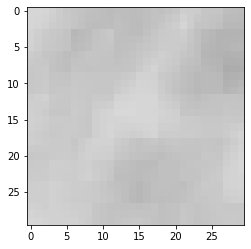

sign: 0 predict: 1


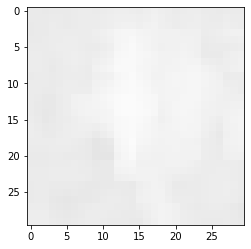

sign: 1 predict: 0


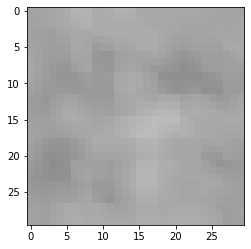

sign: 0 predict: 1


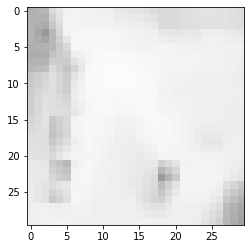

sign: 1 predict: 0


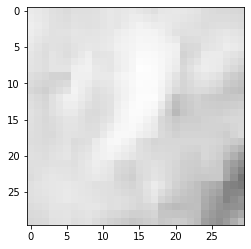

sign: 1 predict: 0


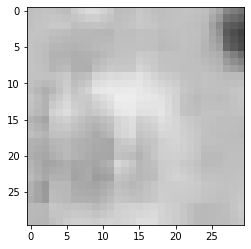

sign: 0 predict: 1


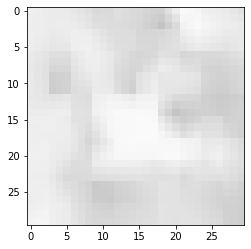

sign: 0 predict: 1


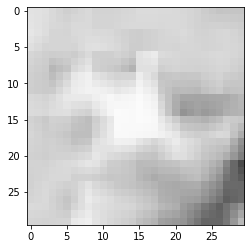

sign: 0 predict: 1


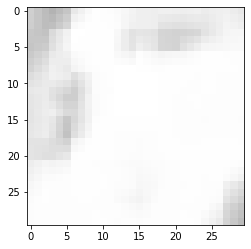

sign: 1 predict: 0


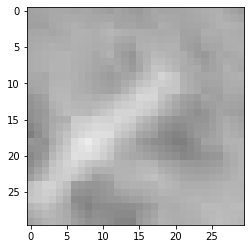

sign: 1 predict: 0


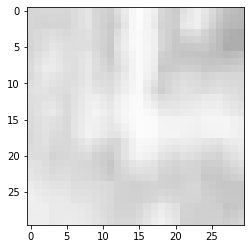

sign: 0 predict: 1


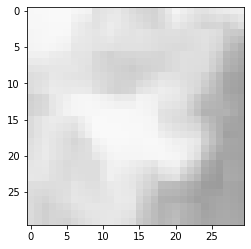

sign: 0 predict: 1


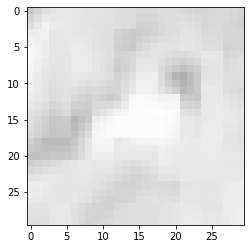

sign: 0 predict: 1


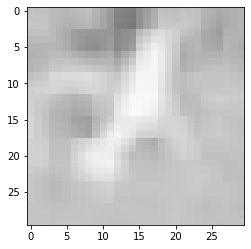

sign: 0 predict: 1


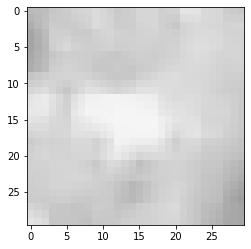

sign: 0 predict: 1


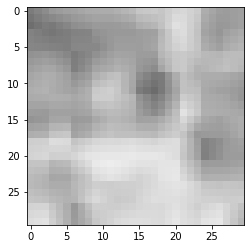

sign: 0 predict: 1


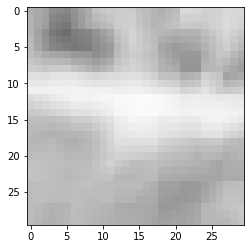

sign: 1 predict: 0


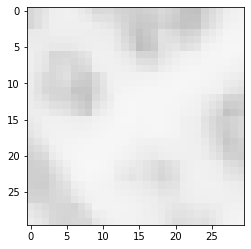

sign: 0 predict: 1


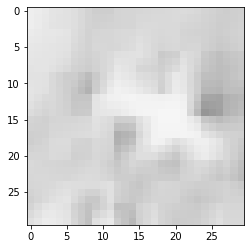

sign: 0 predict: 1


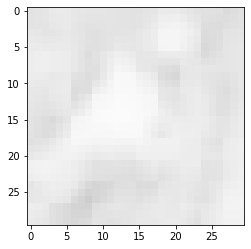

sign: 1 predict: 0


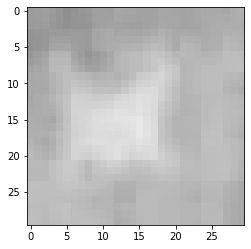

sign: 0 predict: 1


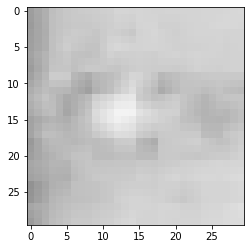

sign: 1 predict: 0


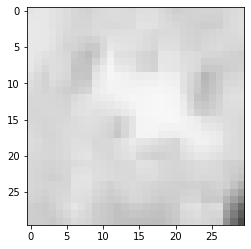

sign: 0 predict: 1


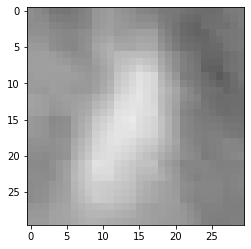

sign: 1 predict: 0


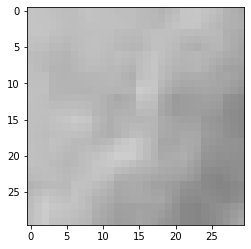

sign: 1 predict: 0


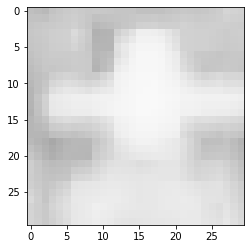

sign: 0 predict: 1


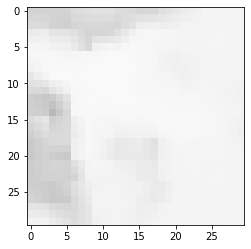

sign: 1 predict: 0


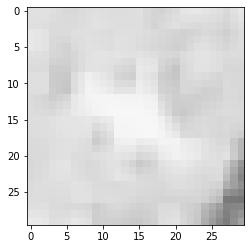

sign: 0 predict: 1


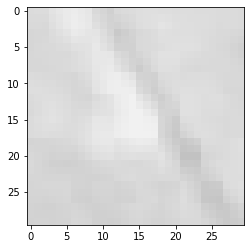

sign: 0 predict: 1


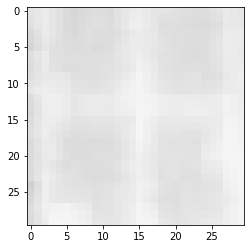

sign: 0 predict: 1


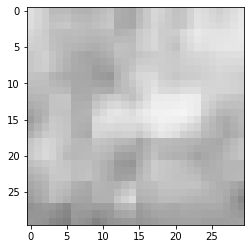

sign: 0 predict: 1


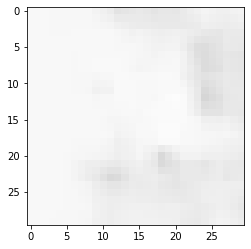

sign: 1 predict: 0


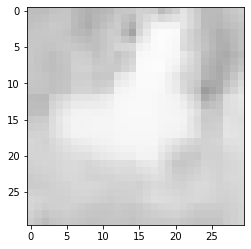

sign: 1 predict: 0


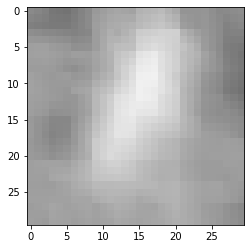

sign: 1 predict: 0


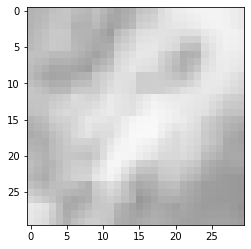

sign: 0 predict: 1


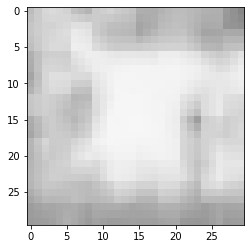

sign: 0 predict: 1


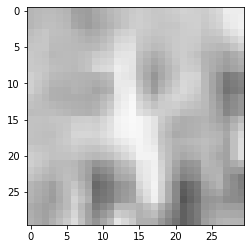

sign: 0 predict: 1


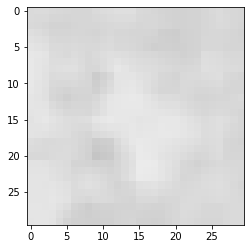

sign: 0 predict: 1


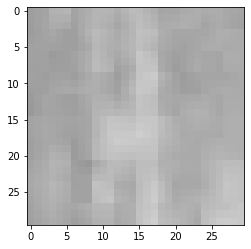

sign: 0 predict: 1


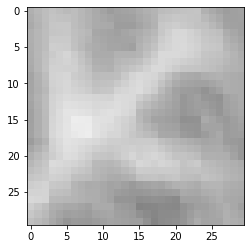

sign: 1 predict: 0


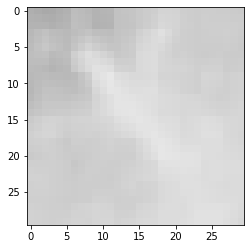

sign: 1 predict: 0


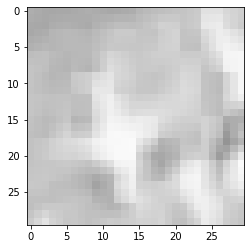

sign: 0 predict: 1


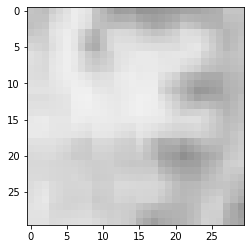

sign: 0 predict: 1


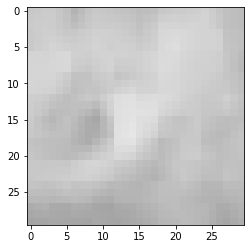

sign: 0 predict: 1


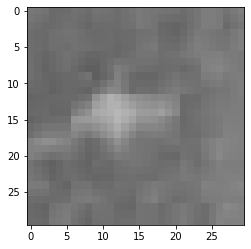

sign: 1 predict: 0


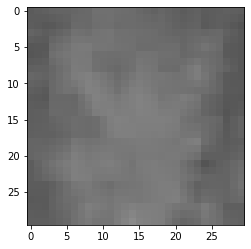

sign: 0 predict: 1


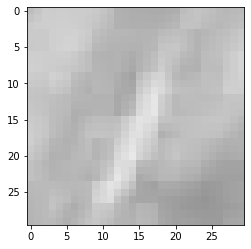

sign: 0 predict: 1


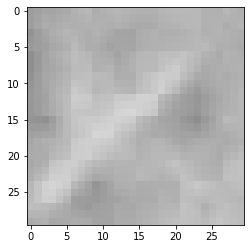

sign: 1 predict: 0


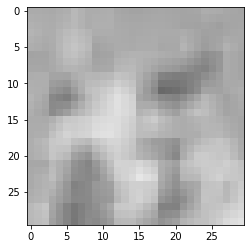

sign: 0 predict: 1


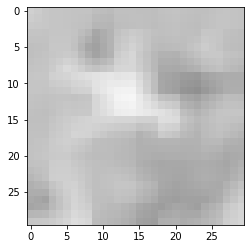

sign: 0 predict: 1


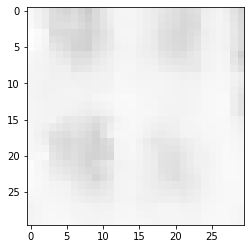

sign: 0 predict: 1


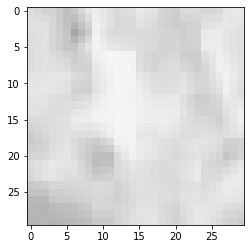

sign: 0 predict: 1


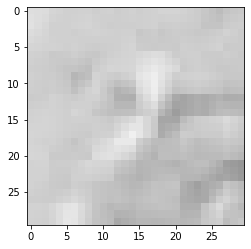

sign: 0 predict: 1


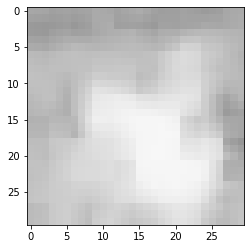

sign: 0 predict: 1


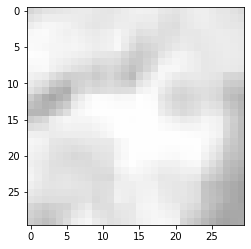

sign: 0 predict: 1


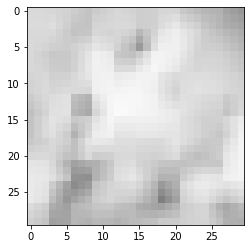

sign: 0 predict: 1


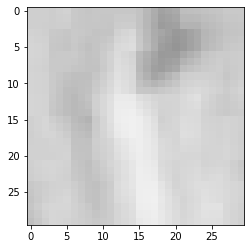

sign: 0 predict: 1


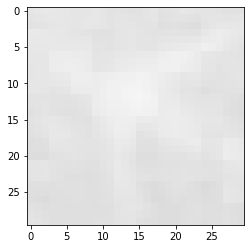

sign: 1 predict: 0


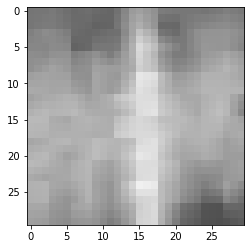

sign: 1 predict: 0


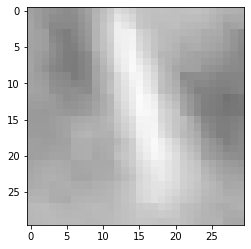

sign: 1 predict: 0


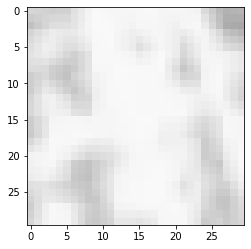

sign: 0 predict: 1


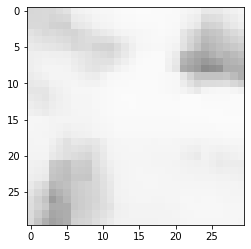

sign: 0 predict: 1


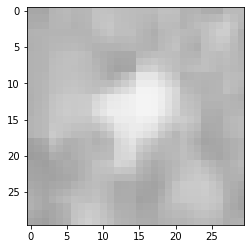

sign: 0 predict: 1


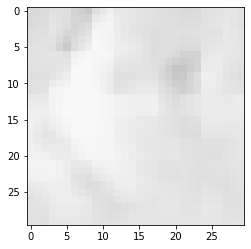

sign: 1 predict: 0


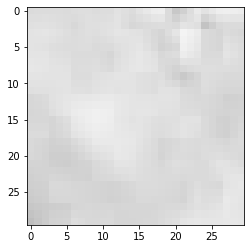

sign: 0 predict: 1


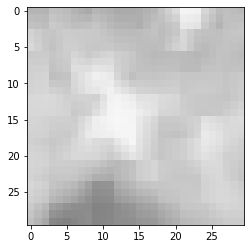

sign: 0 predict: 1


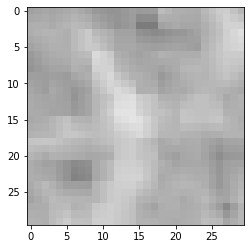

sign: 1 predict: 0


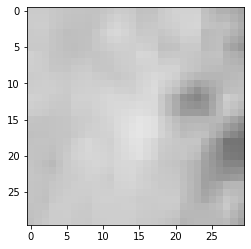

sign: 0 predict: 1


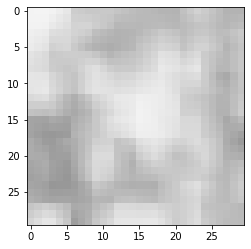

sign: 0 predict: 1


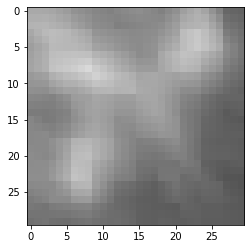

sign: 1 predict: 0


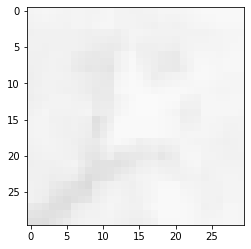

sign: 1 predict: 0


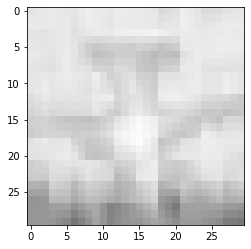

sign: 1 predict: 0


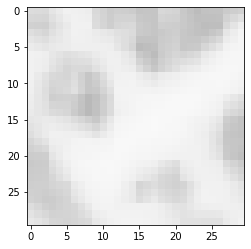

sign: 0 predict: 1


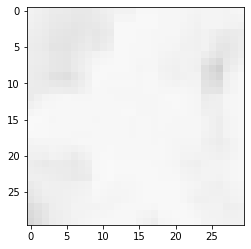

sign: 1 predict: 0


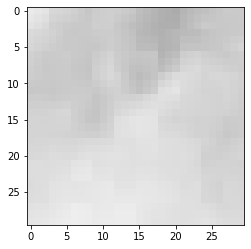

sign: 1 predict: 0


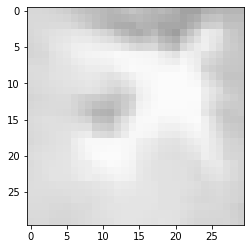

sign: 1 predict: 0


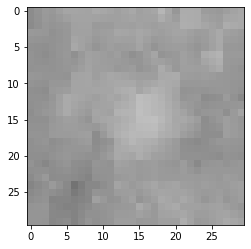

sign: 0 predict: 1


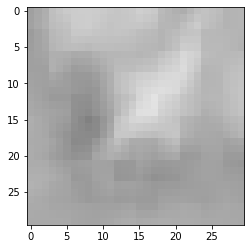

sign: 1 predict: 0


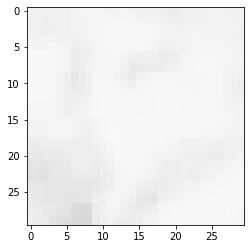

sign: 1 predict: 0


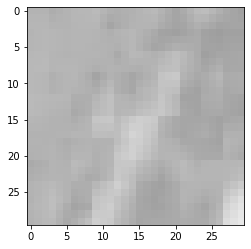

sign: 0 predict: 1


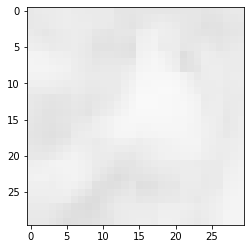

sign: 1 predict: 0


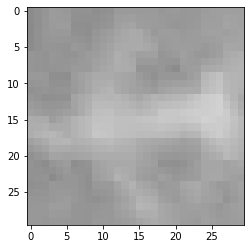

sign: 1 predict: 0


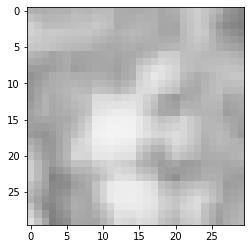

sign: 0 predict: 1


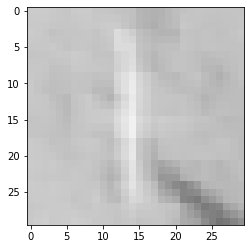

sign: 1 predict: 0


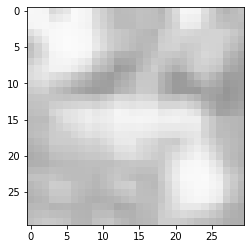

sign: 1 predict: 0


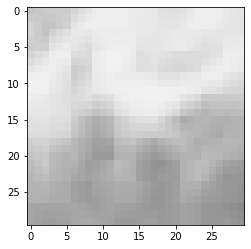

sign: 1 predict: 0


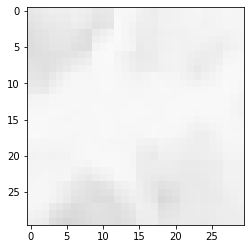

sign: 1 predict: 0


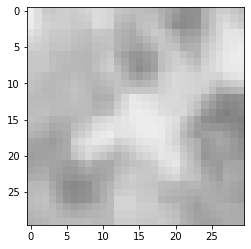

sign: 0 predict: 1


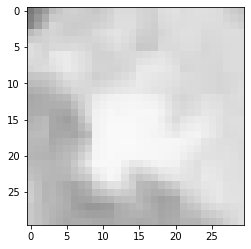

sign: 0 predict: 1


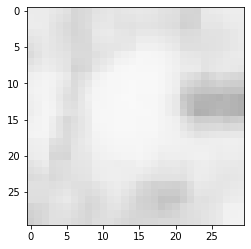

sign: 0 predict: 1


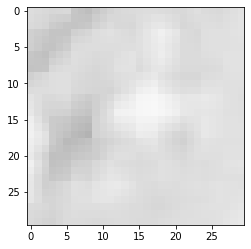

sign: 1 predict: 0


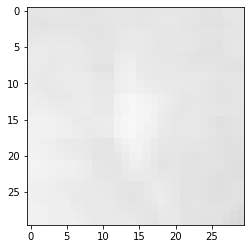

sign: 1 predict: 0


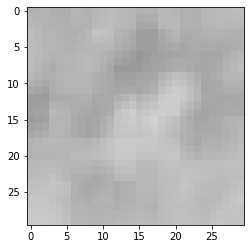

sign: 0 predict: 1


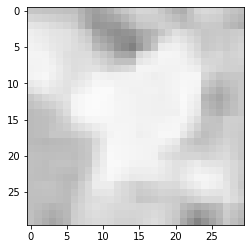

sign: 0 predict: 1


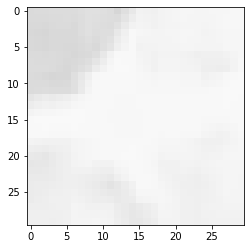

sign: 1 predict: 0


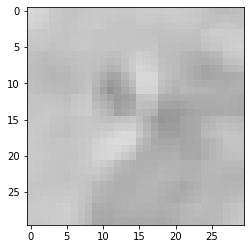

sign: 1 predict: 0


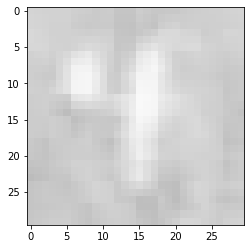

sign: 1 predict: 0


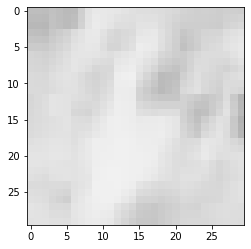

sign: 0 predict: 1


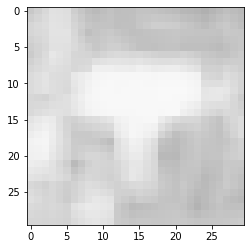

sign: 0 predict: 1


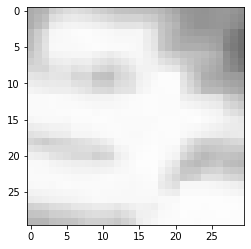

sign: 0 predict: 1


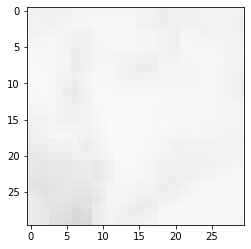

sign: 1 predict: 0


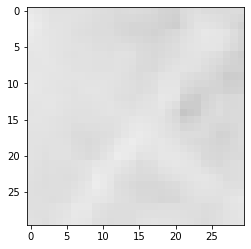

sign: 0 predict: 1


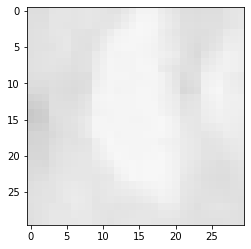

sign: 1 predict: 0


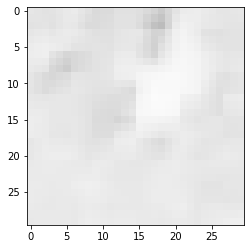

sign: 1 predict: 0


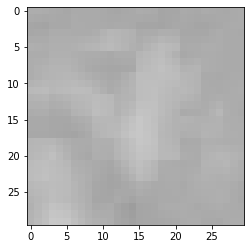

sign: 0 predict: 1


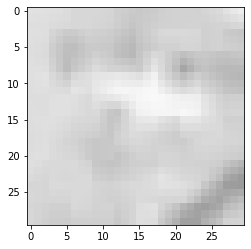

sign: 0 predict: 1


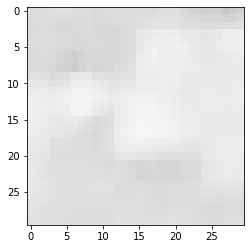

sign: 0 predict: 1


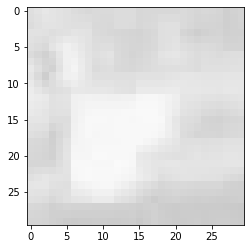

sign: 0 predict: 1


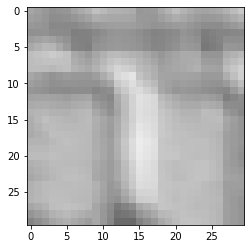

sign: 0 predict: 1


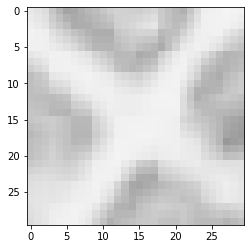

sign: 0 predict: 1


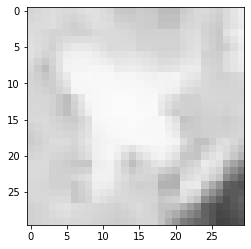

sign: 0 predict: 1


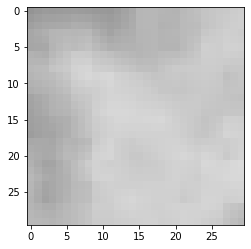

sign: 0 predict: 1


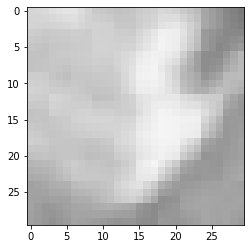

sign: 0 predict: 1


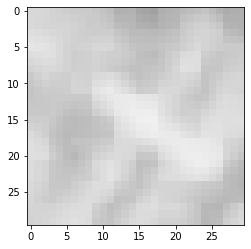

sign: 0 predict: 1


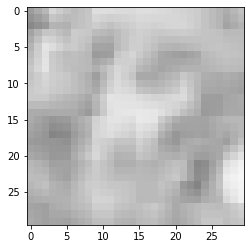

sign: 0 predict: 1


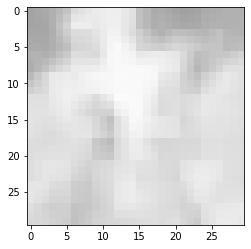

sign: 1 predict: 0


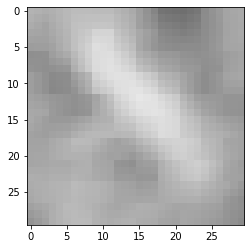

sign: 1 predict: 0


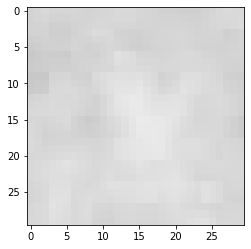

sign: 0 predict: 1


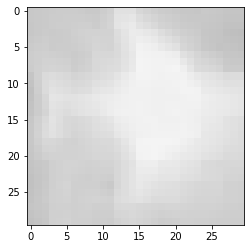

sign: 1 predict: 0


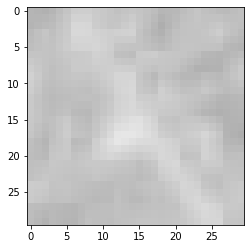

sign: 0 predict: 1


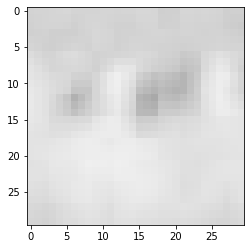

sign: 0 predict: 1


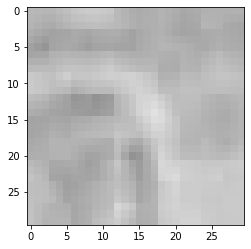

sign: 0 predict: 1


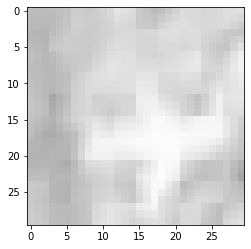

sign: 0 predict: 1


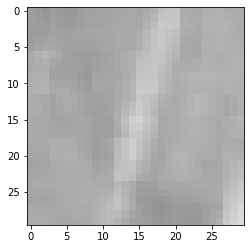

sign: 0 predict: 1


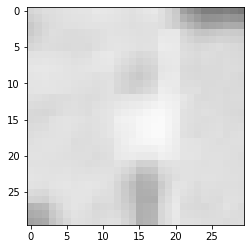

sign: 0 predict: 1


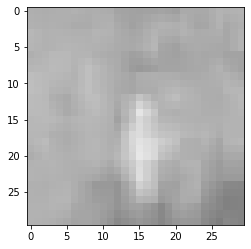

sign: 1 predict: 0


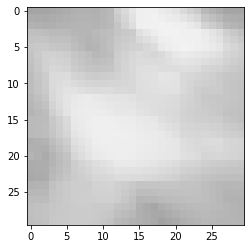

sign: 1 predict: 0


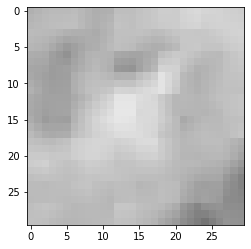

sign: 0 predict: 1


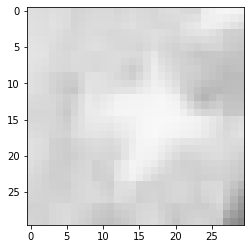

sign: 0 predict: 1


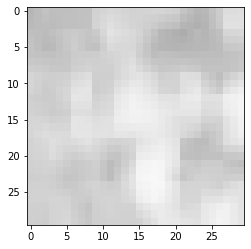

sign: 0 predict: 1


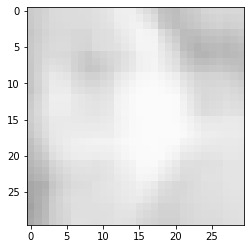

sign: 1 predict: 0


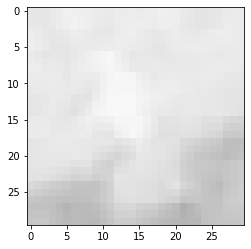

sign: 1 predict: 0


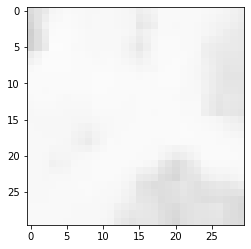

sign: 1 predict: 0


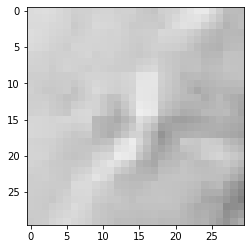

sign: 0 predict: 1


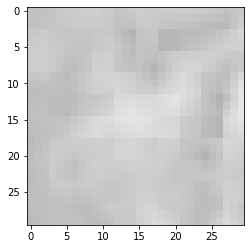

sign: 0 predict: 1


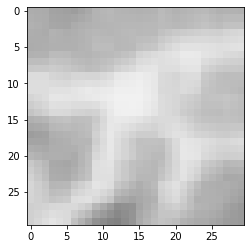

sign: 0 predict: 1


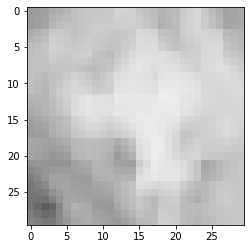

sign: 0 predict: 1


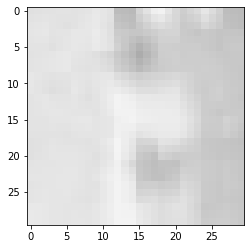

sign: 0 predict: 1


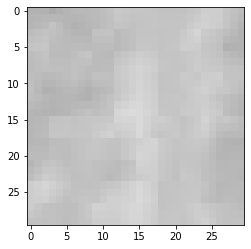

sign: 0 predict: 1


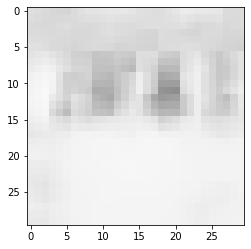

sign: 0 predict: 1


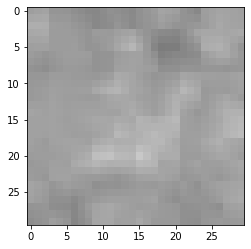

sign: 0 predict: 1


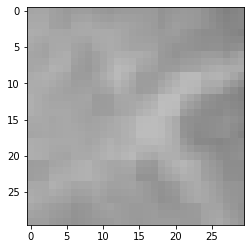

sign: 0 predict: 1


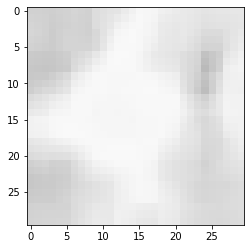

sign: 1 predict: 0


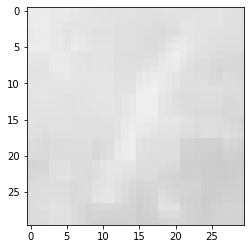

sign: 1 predict: 0


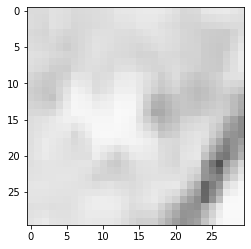

sign: 0 predict: 1


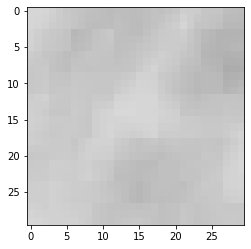

sign: 0 predict: 1


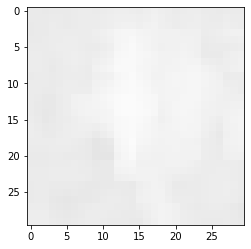

sign: 1 predict: 0


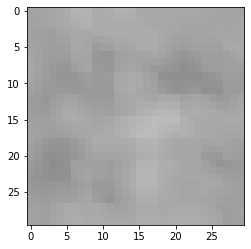

sign: 0 predict: 1


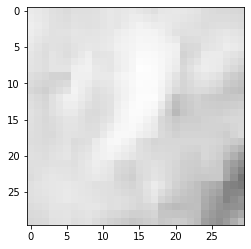

sign: 1 predict: 0


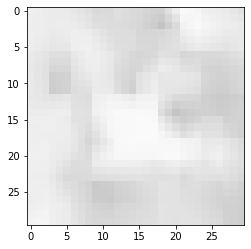

sign: 0 predict: 1


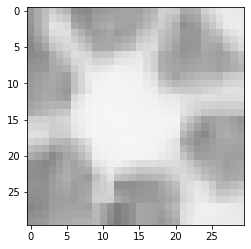

sign: 0 predict: 1


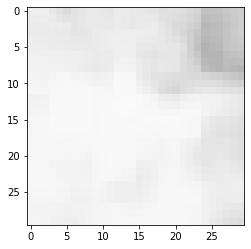

sign: 1 predict: 0


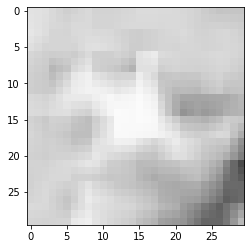

sign: 0 predict: 1


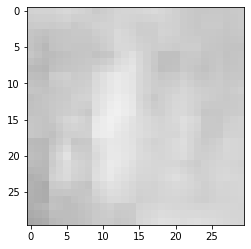

sign: 0 predict: 1


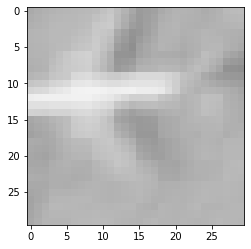

sign: 1 predict: 0


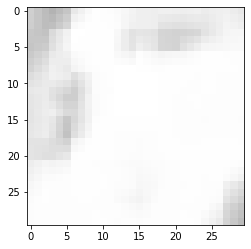

sign: 1 predict: 0


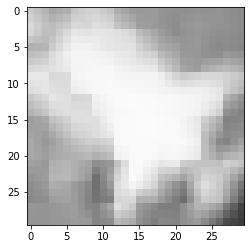

sign: 1 predict: 0


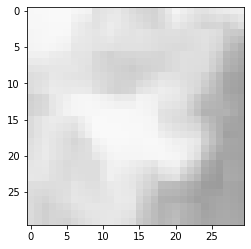

sign: 0 predict: 1


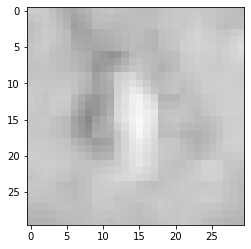

sign: 1 predict: 0


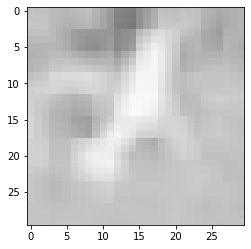

sign: 0 predict: 1


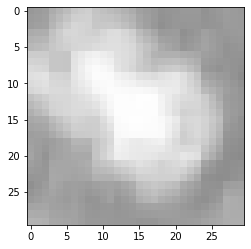

sign: 1 predict: 0


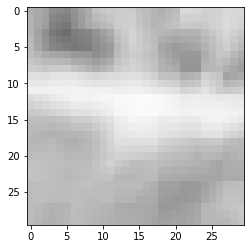

sign: 1 predict: 0


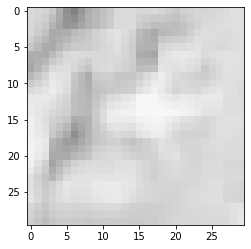

sign: 1 predict: 0


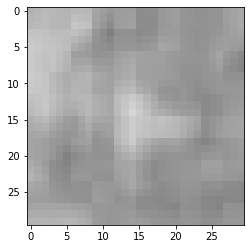

sign: 0 predict: 1


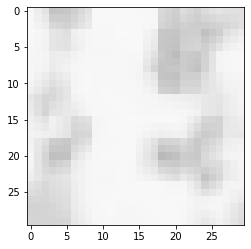

sign: 0 predict: 1


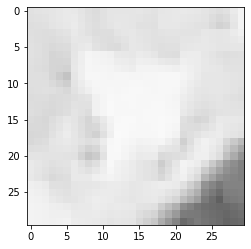

sign: 1 predict: 0


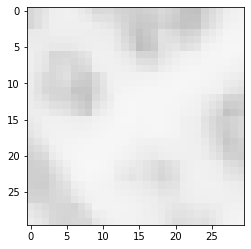

sign: 0 predict: 1


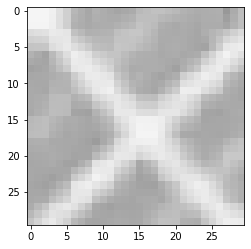

sign: 0 predict: 1


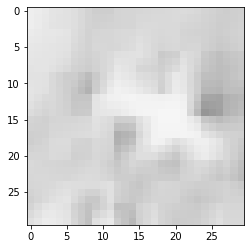

sign: 0 predict: 1


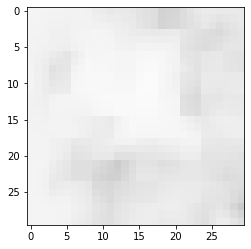

sign: 1 predict: 0


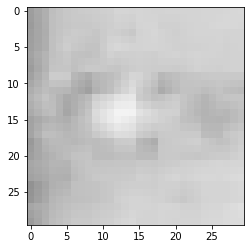

sign: 1 predict: 0


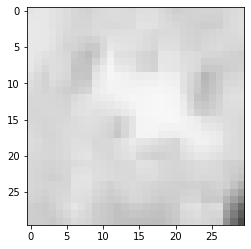

sign: 0 predict: 1


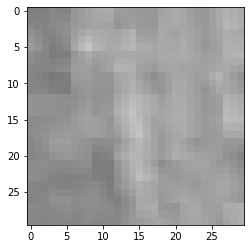

sign: 0 predict: 1


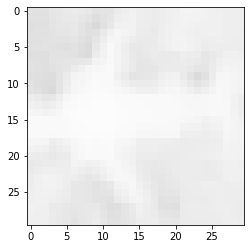

sign: 1 predict: 0


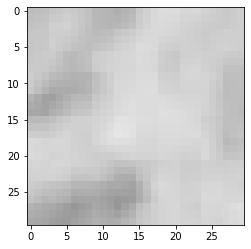

sign: 0 predict: 1


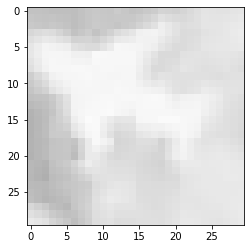

sign: 1 predict: 0


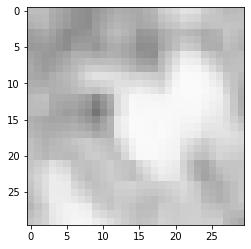

sign: 0 predict: 1


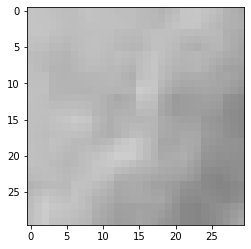

sign: 1 predict: 0


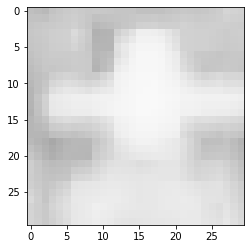

sign: 0 predict: 1


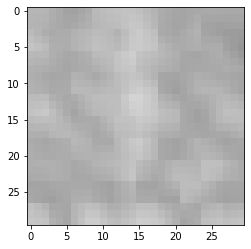

sign: 0 predict: 1


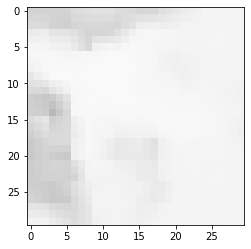

sign: 1 predict: 0


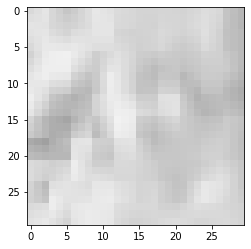

sign: 1 predict: 0


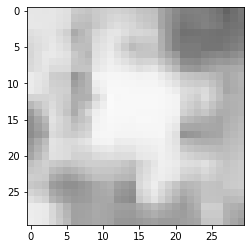

sign: 0 predict: 1


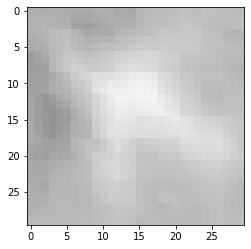

sign: 1 predict: 0


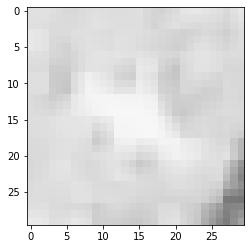

sign: 0 predict: 1


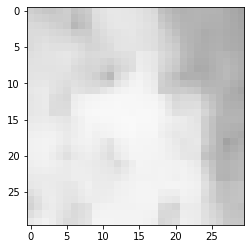

sign: 1 predict: 0


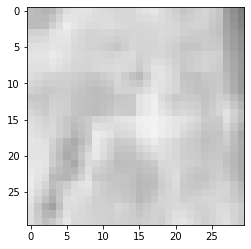

sign: 0 predict: 1


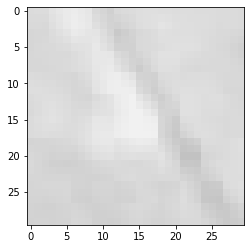

sign: 0 predict: 1


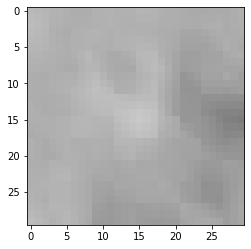

sign: 1 predict: 0


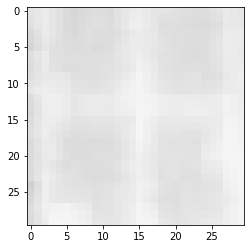

sign: 0 predict: 1


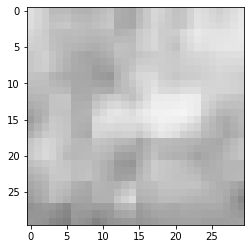

sign: 0 predict: 1


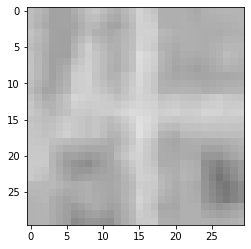

sign: 0 predict: 1


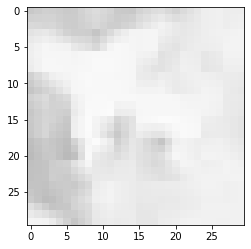

sign: 1 predict: 0


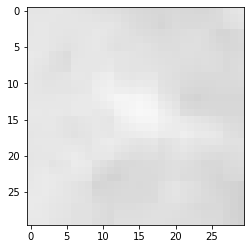

sign: 1 predict: 0


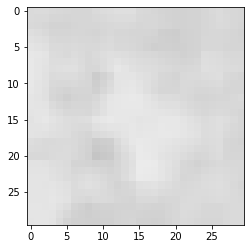

sign: 0 predict: 1


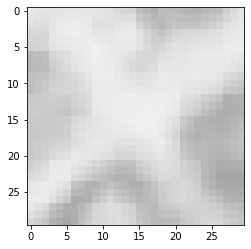

sign: 0 predict: 1


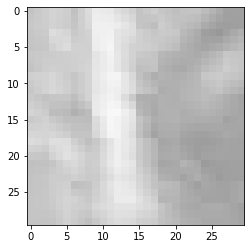

sign: 1 predict: 0


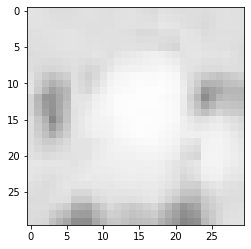

sign: 0 predict: 1


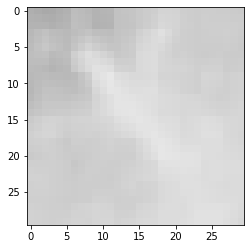

sign: 1 predict: 0


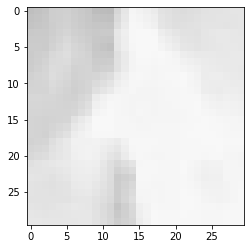

sign: 1 predict: 0


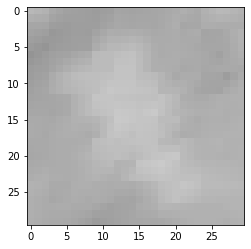

sign: 0 predict: 1


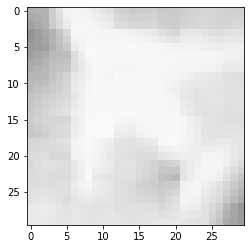

sign: 1 predict: 0


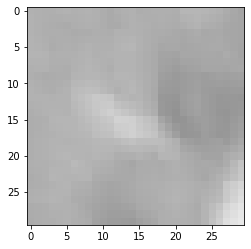

sign: 1 predict: 0


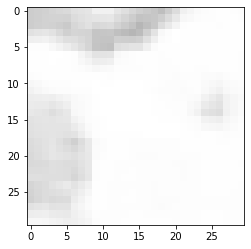

sign: 1 predict: 0


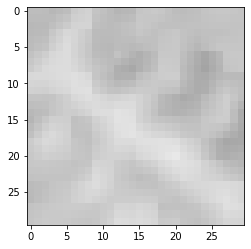

sign: 0 predict: 1


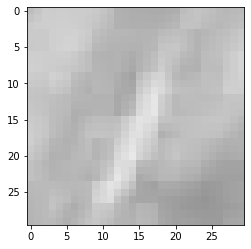

sign: 0 predict: 1


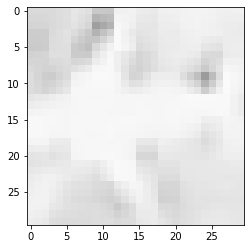

sign: 1 predict: 0


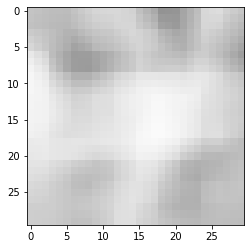

sign: 1 predict: 0


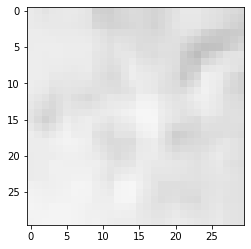

sign: 1 predict: 0


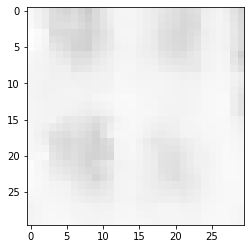

sign: 0 predict: 1


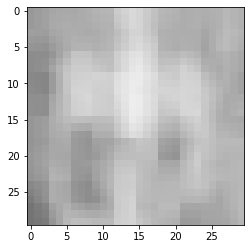

sign: 0 predict: 1


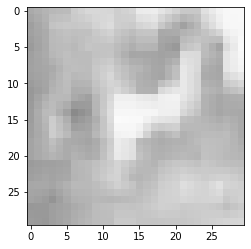

sign: 1 predict: 0


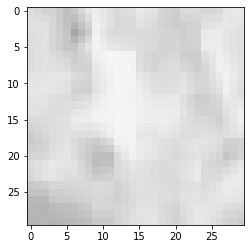

sign: 0 predict: 1


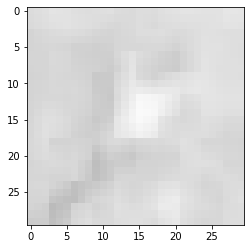

sign: 1 predict: 0


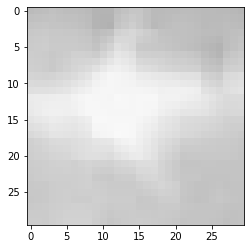

sign: 1 predict: 0


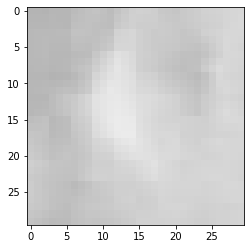

sign: 1 predict: 0


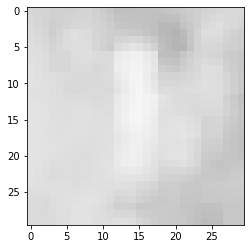

sign: 0 predict: 1


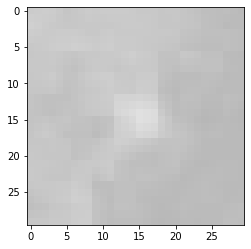

sign: 1 predict: 0


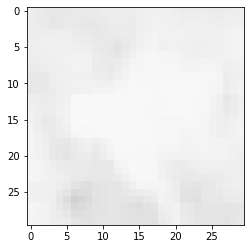

sign: 1 predict: 0


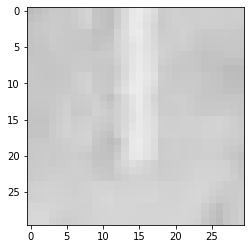

sign: 0 predict: 1


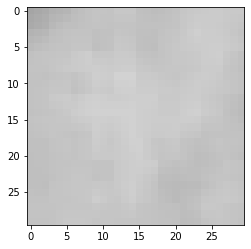

sign: 0 predict: 1


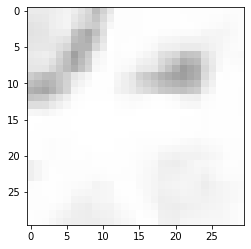

sign: 1 predict: 0


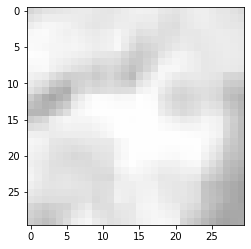

sign: 0 predict: 1


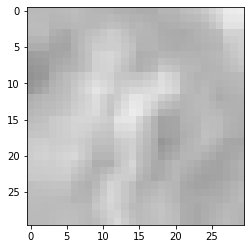

sign: 0 predict: 1


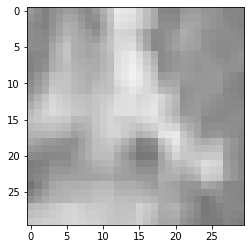

sign: 0 predict: 1


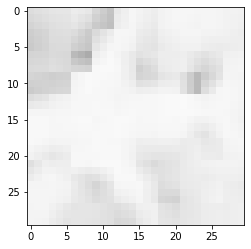

sign: 1 predict: 0


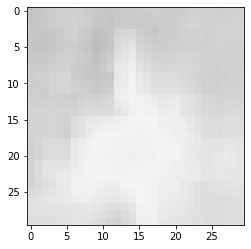

sign: 0 predict: 1


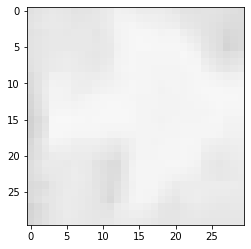

sign: 1 predict: 0


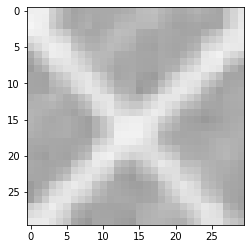

sign: 0 predict: 1


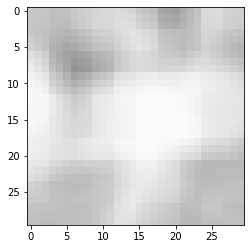

sign: 1 predict: 0


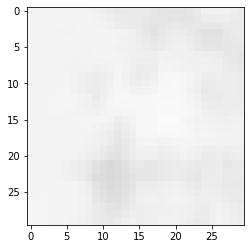

sign: 1 predict: 0


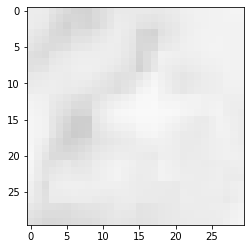

sign: 1 predict: 0


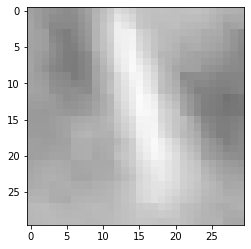

sign: 1 predict: 0


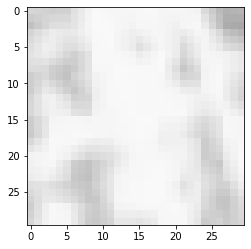

sign: 0 predict: 1


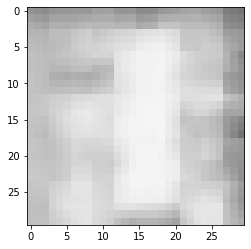

sign: 0 predict: 1


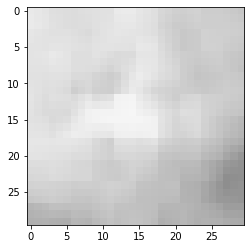

sign: 1 predict: 0


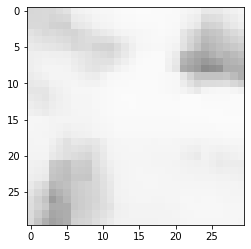

sign: 0 predict: 1


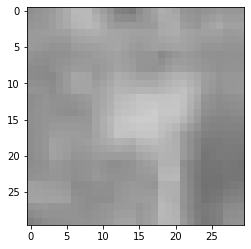

sign: 0 predict: 1


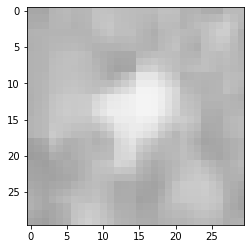

sign: 0 predict: 1


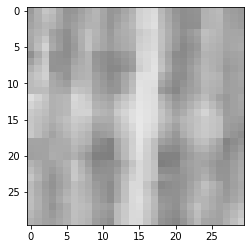

sign: 0 predict: 1


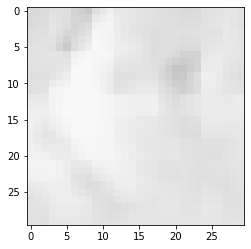

sign: 1 predict: 0


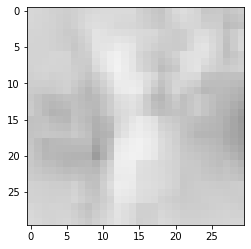

sign: 1 predict: 0


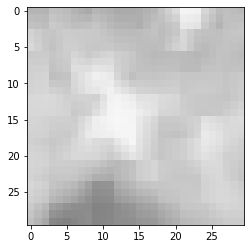

sign: 0 predict: 1


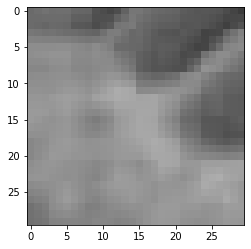

sign: 0 predict: 1


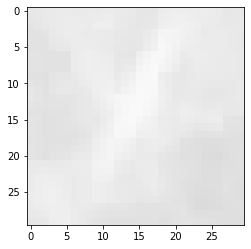

sign: 1 predict: 0


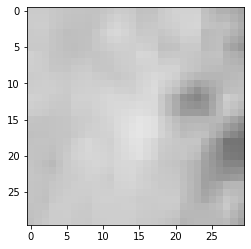

sign: 0 predict: 1


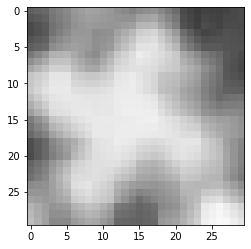

sign: 0 predict: 1


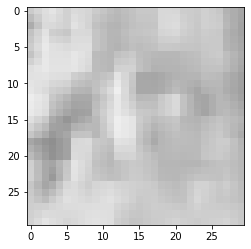

sign: 1 predict: 0


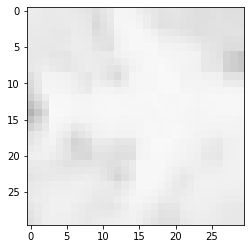

sign: 1 predict: 0


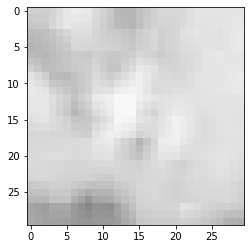

sign: 1 predict: 0


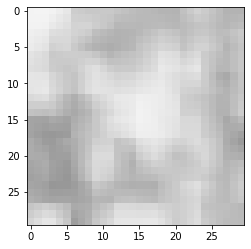

sign: 0 predict: 1


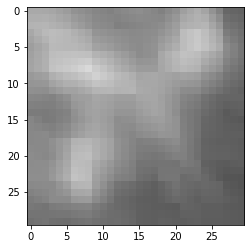

sign: 1 predict: 0


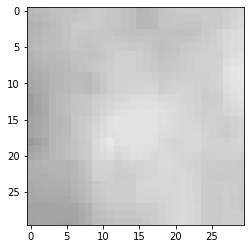

sign: 0 predict: 1


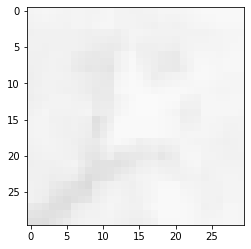

sign: 1 predict: 0


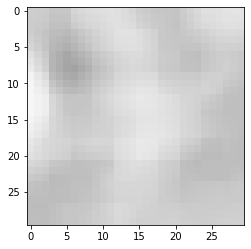

sign: 1 predict: 0


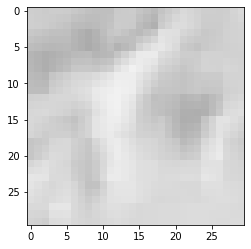

sign: 1 predict: 0


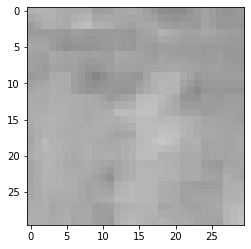

sign: 0 predict: 1


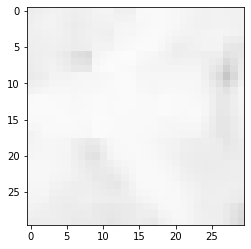

sign: 1 predict: 0


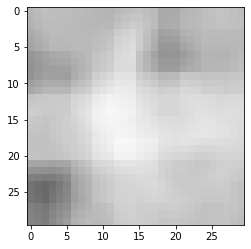

sign: 1 predict: 0


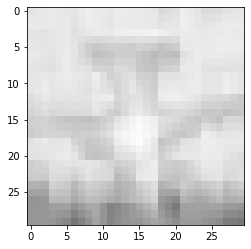

sign: 1 predict: 0


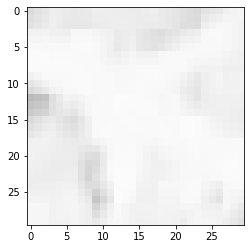

sign: 1 predict: 0


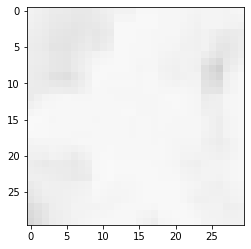

sign: 1 predict: 0


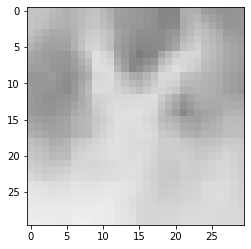

sign: 1 predict: 0


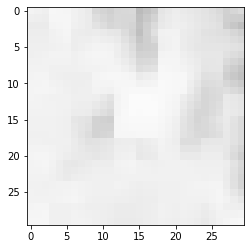

sign: 1 predict: 0


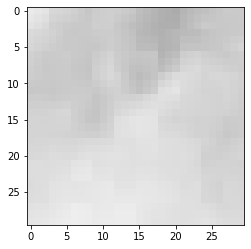

sign: 1 predict: 0


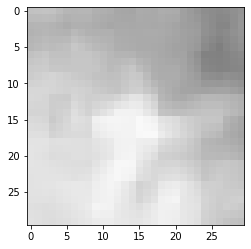

sign: 1 predict: 0


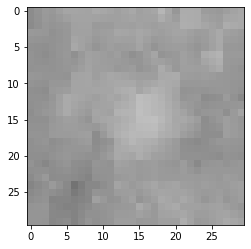

sign: 0 predict: 1


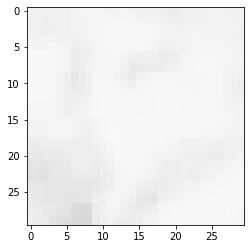

sign: 1 predict: 0


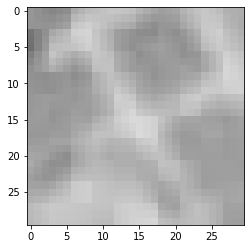

sign: 0 predict: 1


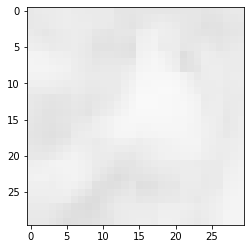

sign: 1 predict: 0


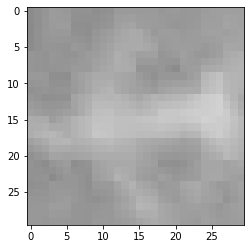

sign: 1 predict: 0


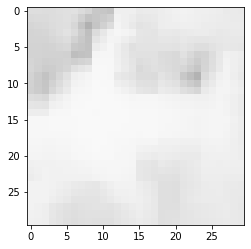

sign: 1 predict: 0


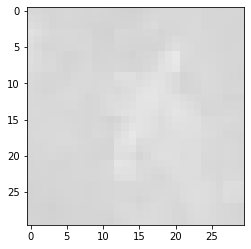

sign: 1 predict: 0


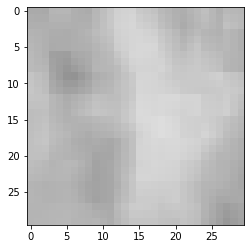

sign: 1 predict: 0


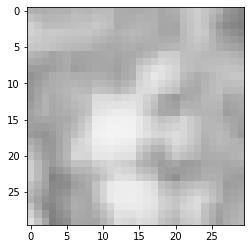

sign: 0 predict: 1


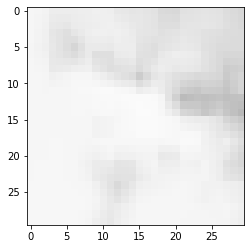

sign: 1 predict: 0


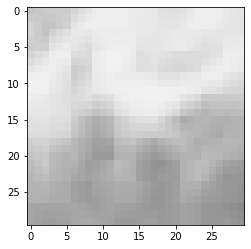

sign: 1 predict: 0


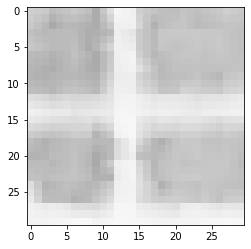

sign: 0 predict: 1


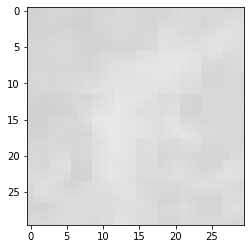

sign: 1 predict: 0


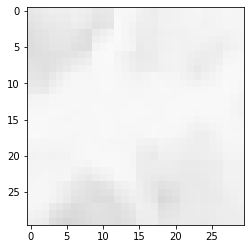

sign: 1 predict: 0


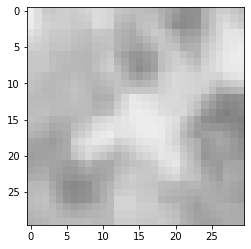

sign: 0 predict: 1


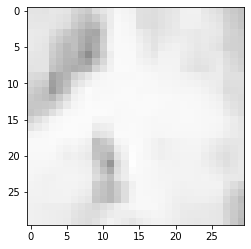

sign: 1 predict: 0


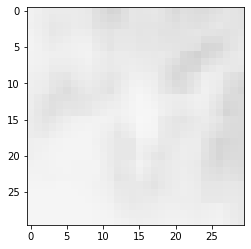

sign: 1 predict: 0


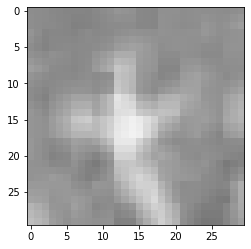

sign: 0 predict: 1


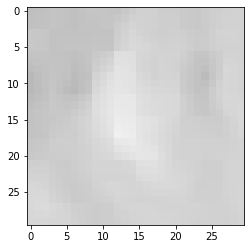

sign: 1 predict: 0


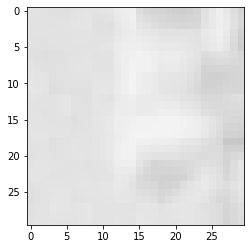

sign: 0 predict: 1


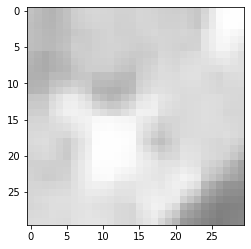

sign: 0 predict: 1


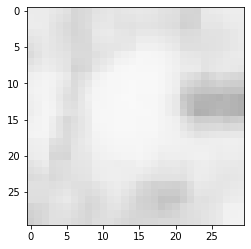

sign: 0 predict: 1


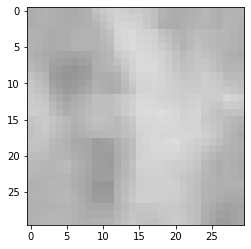

sign: 1 predict: 0


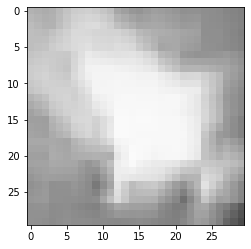

sign: 1 predict: 0


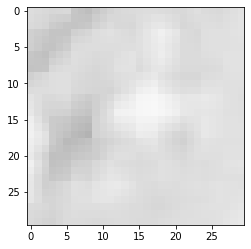

sign: 1 predict: 0


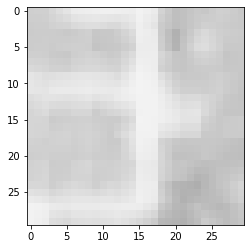

sign: 0 predict: 1


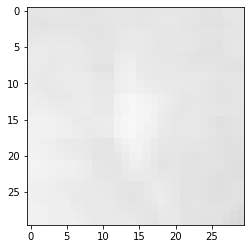

sign: 1 predict: 0


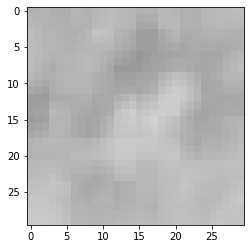

sign: 0 predict: 1


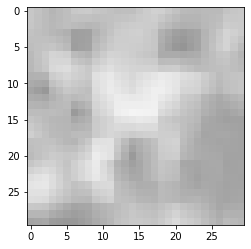

sign: 0 predict: 1


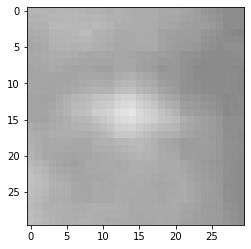

sign: 1 predict: 0


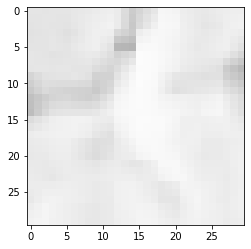

sign: 1 predict: 0


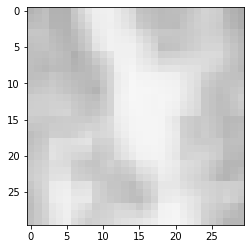

sign: 0 predict: 1


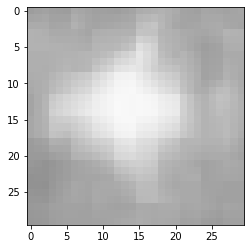

sign: 1 predict: 0


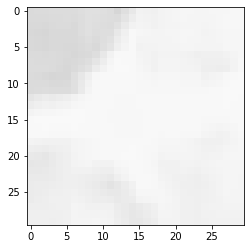

sign: 1 predict: 0


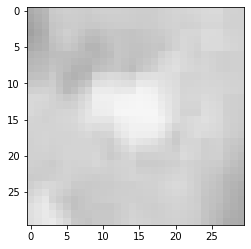

sign: 1 predict: 0


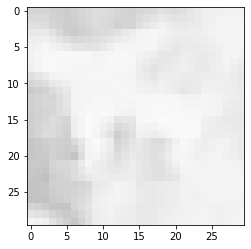

sign: 1 predict: 0


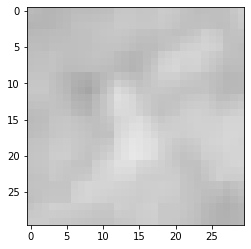

sign: 0 predict: 1


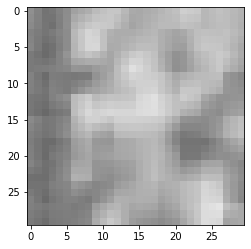

sign: 0 predict: 1


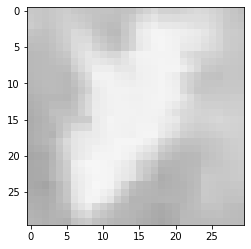

sign: 1 predict: 0


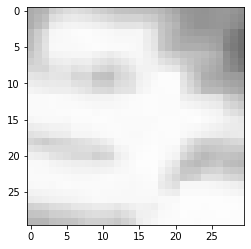

sign: 0 predict: 1


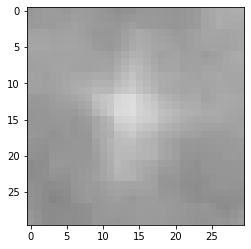

sign: 1 predict: 0


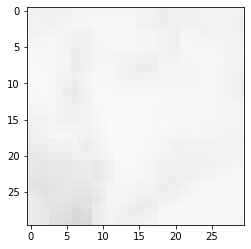

sign: 1 predict: 0


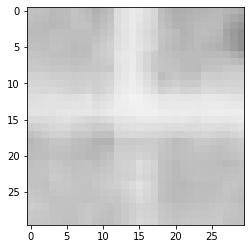

sign: 0 predict: 1


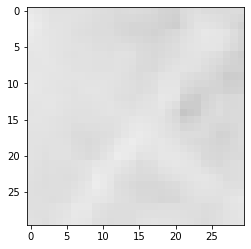

sign: 0 predict: 1


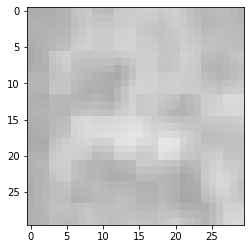

sign: 0 predict: 1


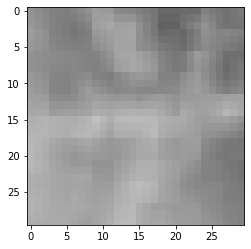

sign: 1 predict: 0


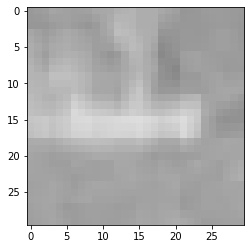

sign: 0 predict: 1


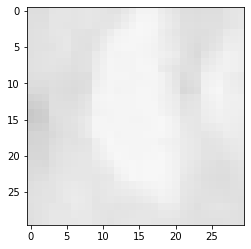

sign: 1 predict: 0


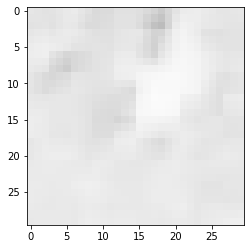

sign: 1 predict: 0


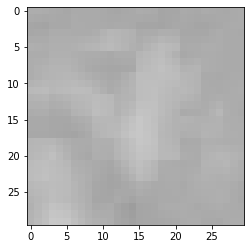

sign: 0 predict: 1


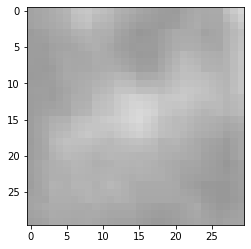

sign: 1 predict: 0


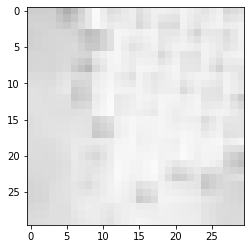

sign: 0 predict: 1


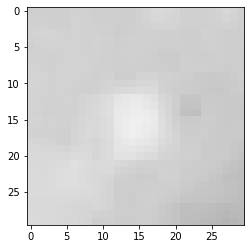

sign: 0 predict: 1


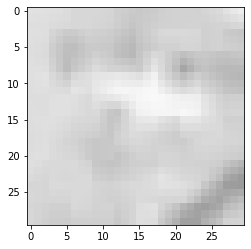

sign: 0 predict: 1


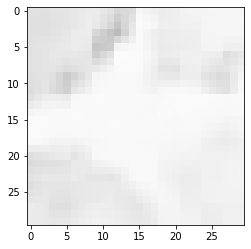

sign: 1 predict: 0


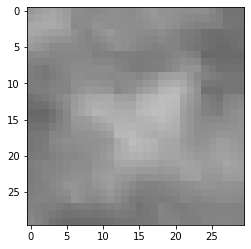

sign: 0 predict: 1


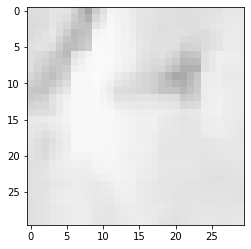

sign: 1 predict: 0


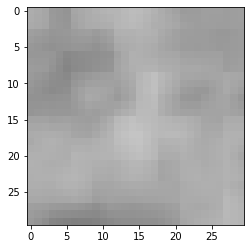

sign: 0 predict: 1


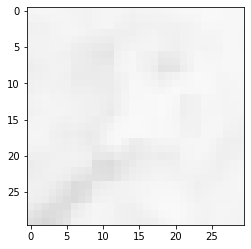

sign: 1 predict: 0


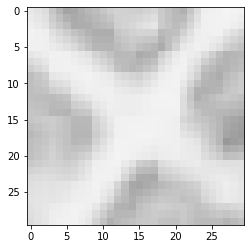

sign: 0 predict: 1


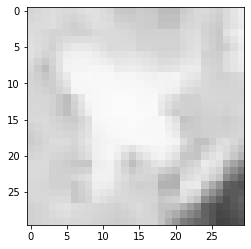

sign: 0 predict: 1


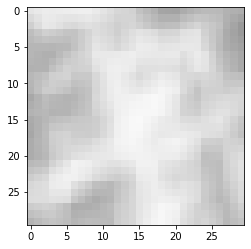

sign: 0 predict: 1


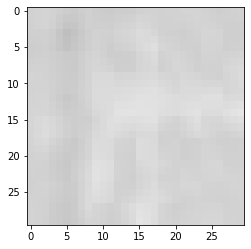

sign: 0 predict: 1


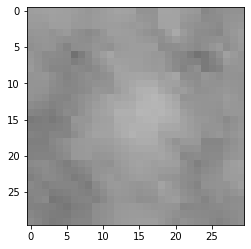

sign: 0 predict: 1


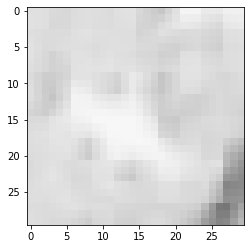

sign: 0 predict: 1


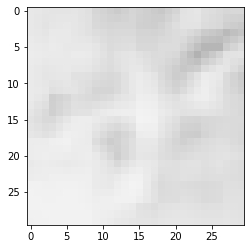

sign: 1 predict: 0


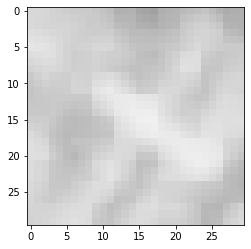

sign: 0 predict: 1


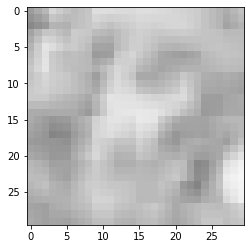

sign: 0 predict: 1


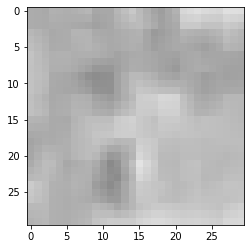

sign: 0 predict: 1


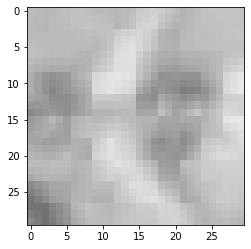

sign: 1 predict: 0


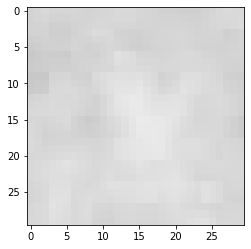

sign: 0 predict: 1


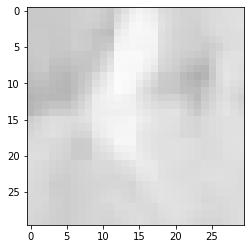

sign: 1 predict: 0


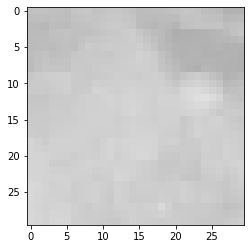

sign: 0 predict: 1


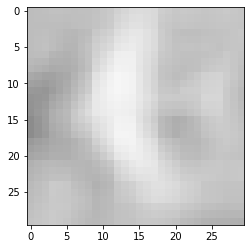

sign: 1 predict: 0


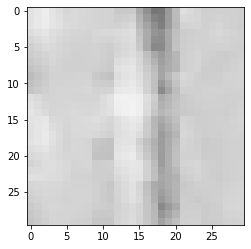

sign: 0 predict: 1


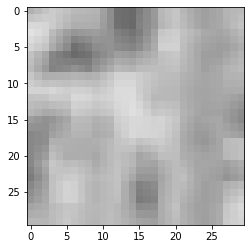

sign: 0 predict: 1


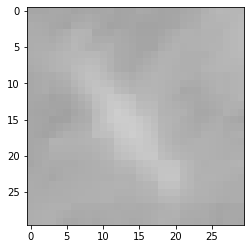

sign: 1 predict: 0


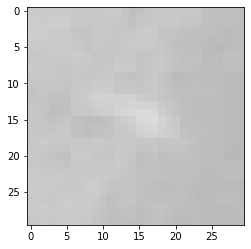

sign: 1 predict: 0


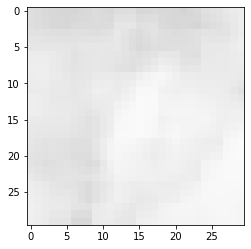

sign: 1 predict: 0


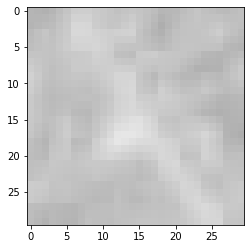

sign: 0 predict: 1


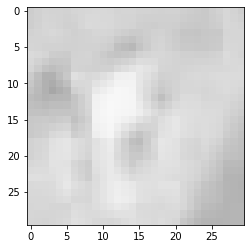

sign: 1 predict: 0


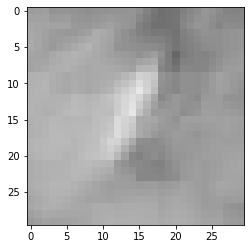

sign: 1 predict: 0


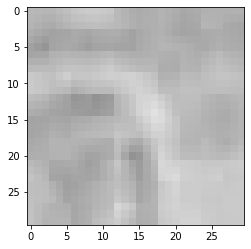

sign: 0 predict: 1


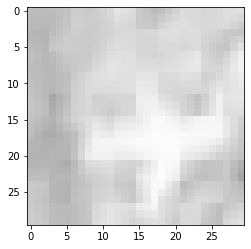

sign: 0 predict: 1


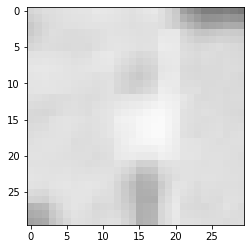

sign: 0 predict: 1


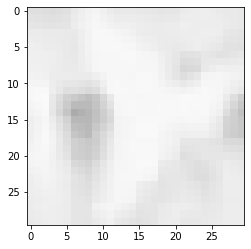

sign: 1 predict: 0


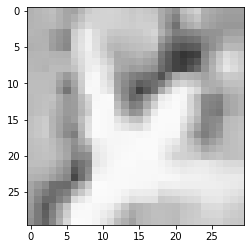

sign: 1 predict: 0


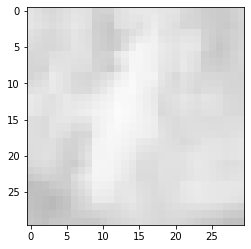

sign: 0 predict: 1


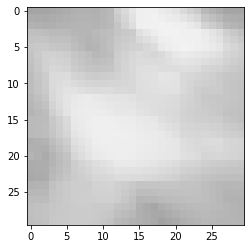

sign: 1 predict: 0


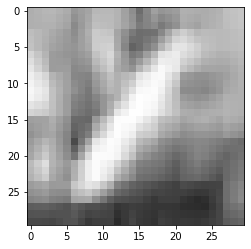

sign: 1 predict: 0


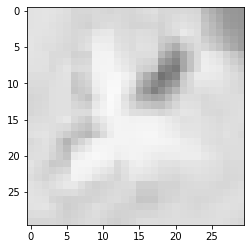

sign: 1 predict: 0


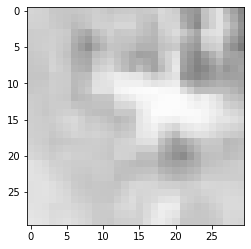

sign: 1 predict: 0


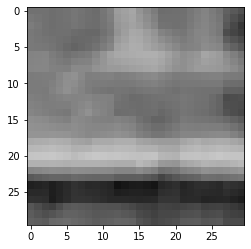

sign: 0 predict: 1


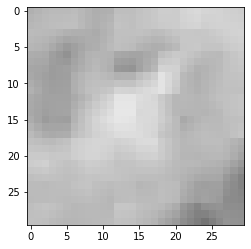

sign: 0 predict: 1


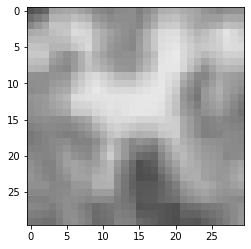

sign: 0 predict: 1


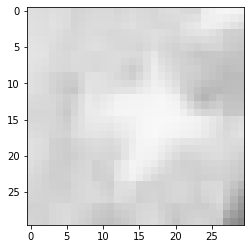

sign: 0 predict: 1


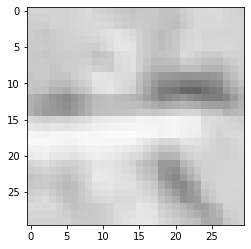

sign: 1 predict: 0


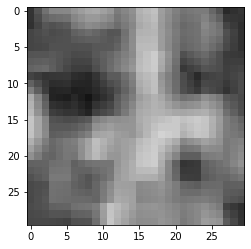

sign: 0 predict: 1


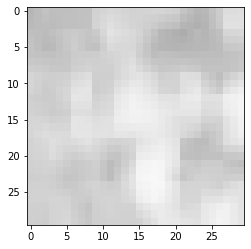

sign: 0 predict: 1


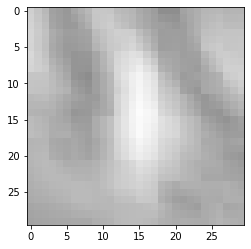

sign: 1 predict: 0


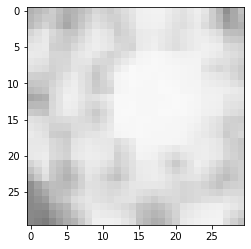

sign: 0 predict: 1


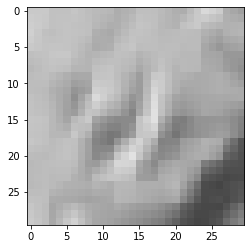

sign: 1 predict: 0


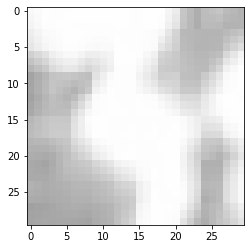

sign: 0 predict: 1


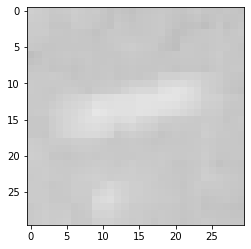

sign: 0 predict: 1


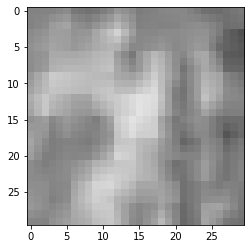

sign: 0 predict: 1


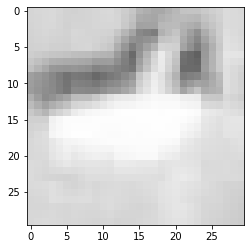

sign: 1 predict: 0


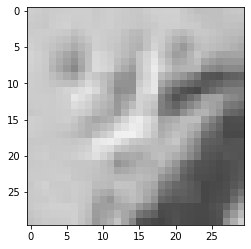

sign: 1 predict: 0


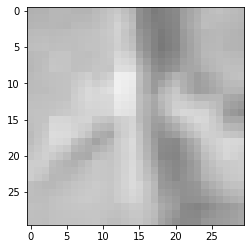

sign: 1 predict: 0


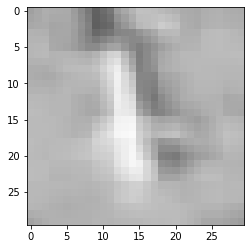

sign: 1 predict: 0


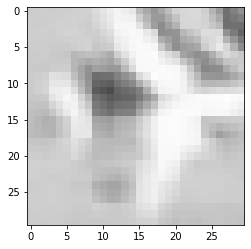

sign: 1 predict: 0


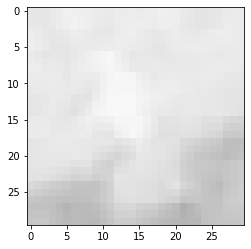

sign: 1 predict: 0


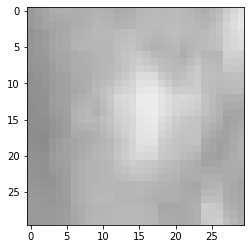

sign: 1 predict: 0


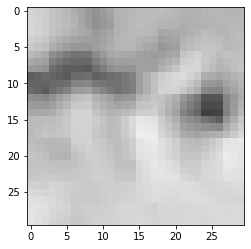

sign: 1 predict: 0


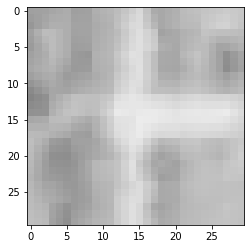

sign: 0 predict: 1


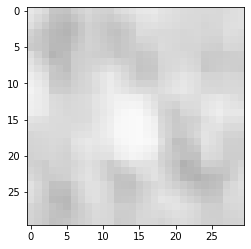

sign: 0 predict: 1


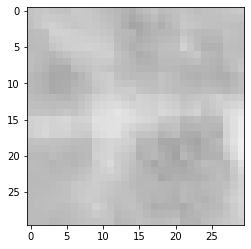

sign: 1 predict: 0


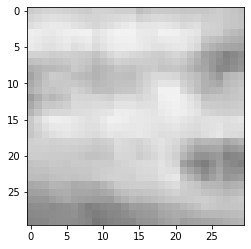

sign: 0 predict: 1


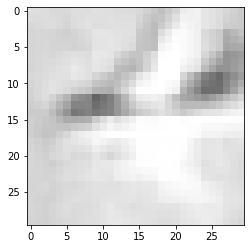

sign: 1 predict: 0


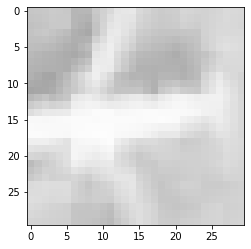

sign: 1 predict: 0


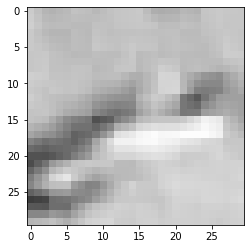

sign: 1 predict: 0


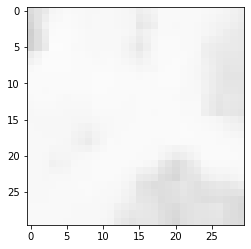

sign: 1 predict: 0


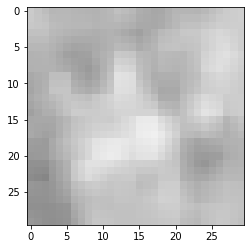

sign: 0 predict: 1


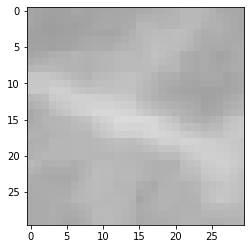

sign: 1 predict: 0


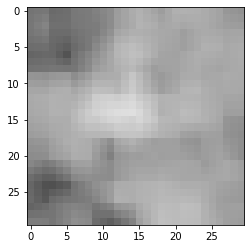

sign: 0 predict: 1


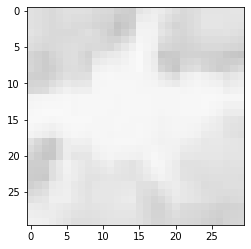

sign: 1 predict: 0


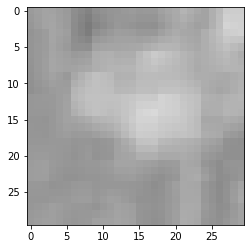

sign: 0 predict: 1


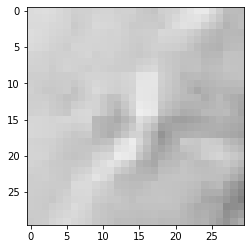

sign: 0 predict: 1


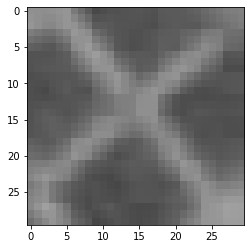

sign: 0 predict: 1


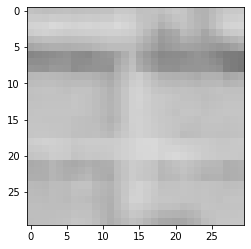

sign: 0 predict: 1


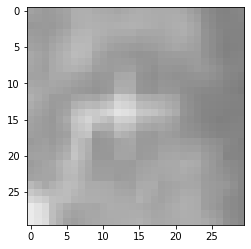

sign: 1 predict: 0


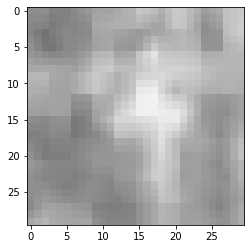

sign: 0 predict: 1


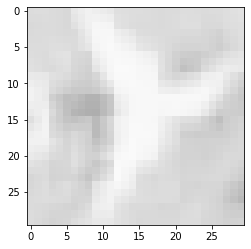

sign: 1 predict: 0


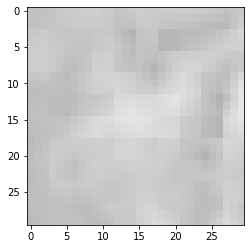

sign: 0 predict: 1


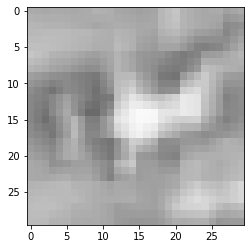

sign: 1 predict: 0


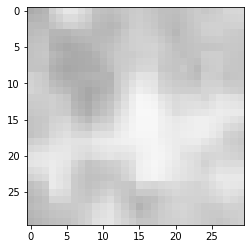

sign: 0 predict: 1


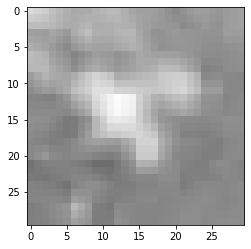

sign: 1 predict: 0


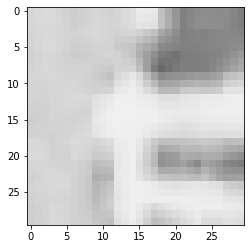

sign: 0 predict: 1


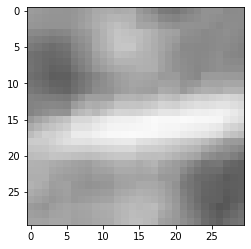

sign: 1 predict: 0


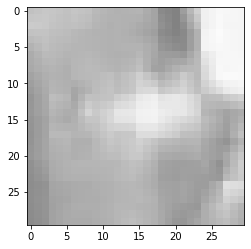

sign: 1 predict: 0


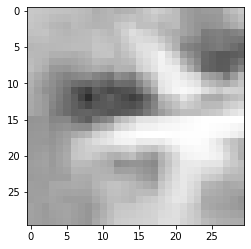

sign: 1 predict: 0


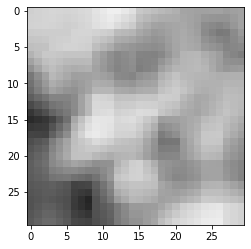

sign: 0 predict: 1


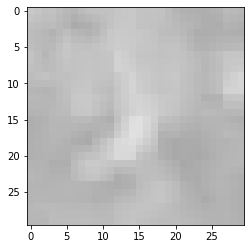

sign: 0 predict: 1


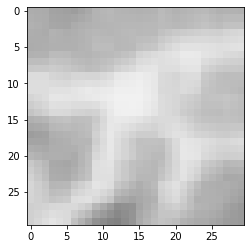

sign: 0 predict: 1


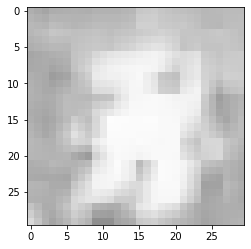

sign: 0 predict: 1


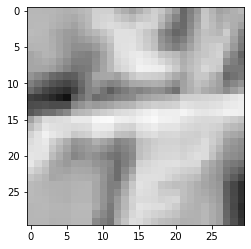

sign: 1 predict: 0


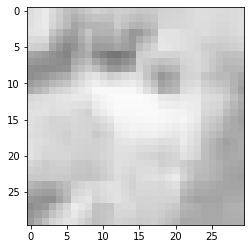

sign: 0 predict: 1


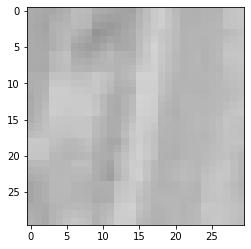

sign: 0 predict: 1


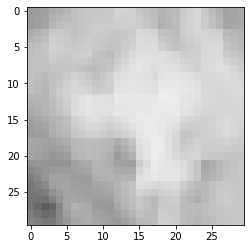

sign: 0 predict: 1


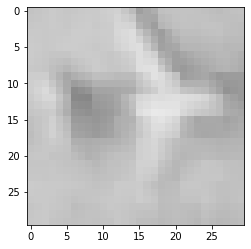

sign: 1 predict: 0


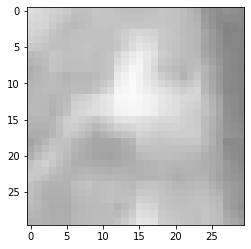

sign: 1 predict: 0


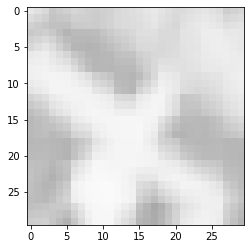

sign: 0 predict: 1


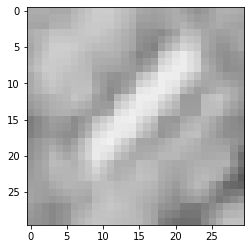

sign: 0 predict: 1


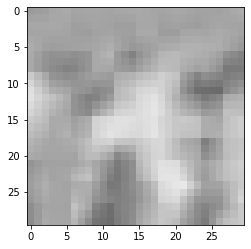

sign: 0 predict: 1


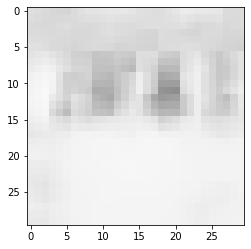

sign: 0 predict: 1


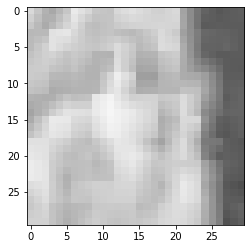

sign: 1 predict: 0


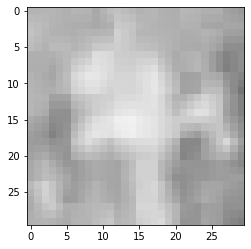

sign: 0 predict: 1


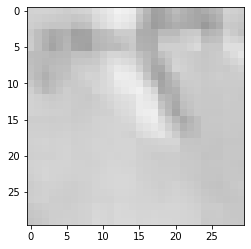

sign: 0 predict: 1


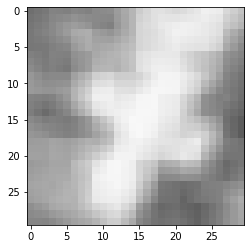

sign: 0 predict: 1


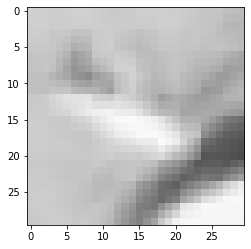

sign: 1 predict: 0


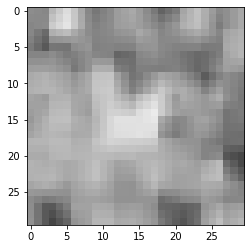

sign: 0 predict: 1


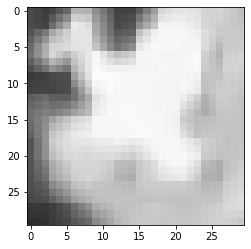

sign: 1 predict: 0


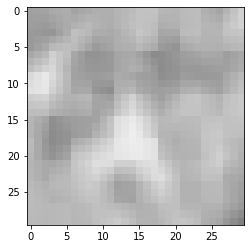

sign: 0 predict: 1


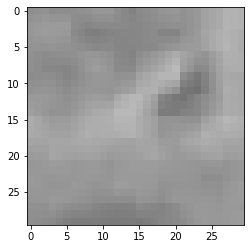

sign: 0 predict: 1


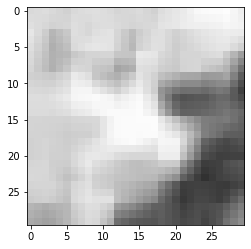

sign: 1 predict: 0


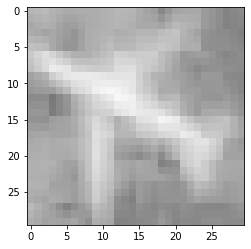

sign: 1 predict: 0


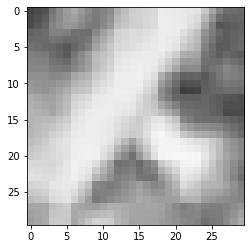

sign: 0 predict: 1


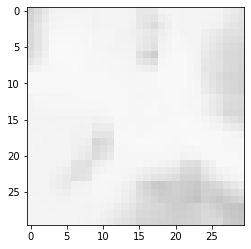

sign: 1 predict: 0


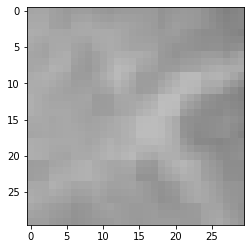

sign: 0 predict: 1


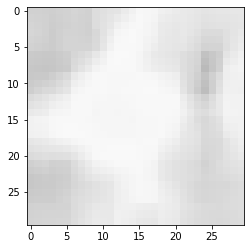

sign: 1 predict: 0


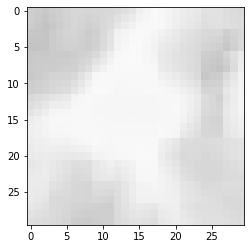

sign: 1 predict: 0


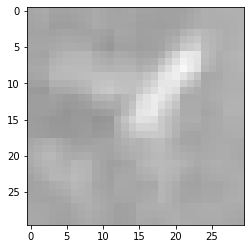

sign: 1 predict: 0


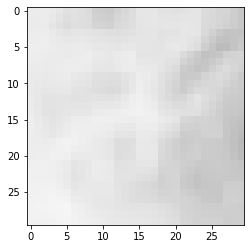

sign: 1 predict: 0


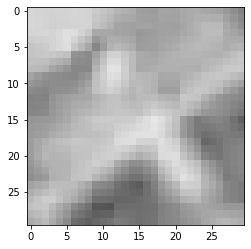

sign: 0 predict: 1


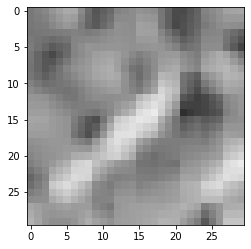

sign: 0 predict: 1


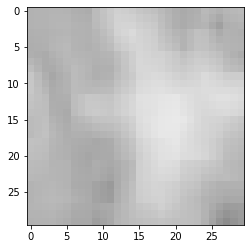

sign: 1 predict: 0


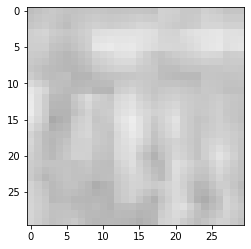

sign: 0 predict: 1


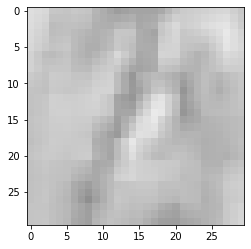

sign: 0 predict: 1


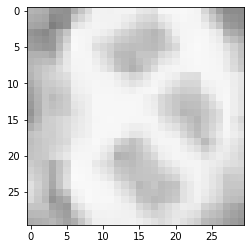

sign: 0 predict: 1


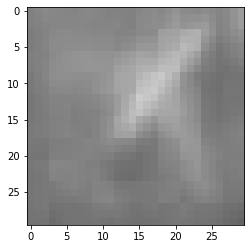

sign: 1 predict: 0


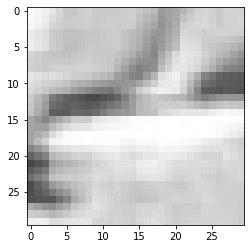

sign: 1 predict: 0


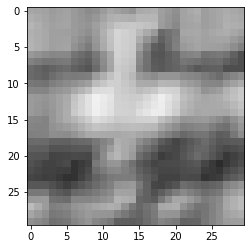

sign: 0 predict: 1


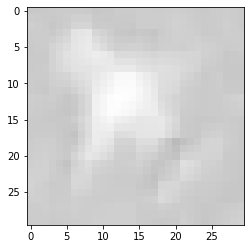

sign: 1 predict: 0


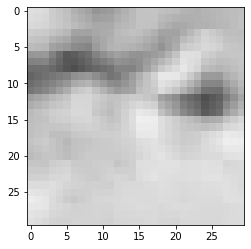

sign: 1 predict: 0


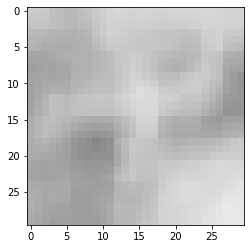

sign: 1 predict: 0


In [13]:
#Посмотреть что не так с 6%
import os
import cv2
import matplotlib.pyplot as plt

r = model.predict_classes(x_train)
print(r.shape)
data_train = pd.read_csv('train.csv')
data_train = pd.concat((data_train, data_train))
print(data_train.head(5))
data_train['sign_predict'] = r
data_train = data_train[['sign', 'sign_predict', 'filename']]
print(data_train.head(5))

data_error = data_train[data_train['sign']!=data_train['sign_predict']]
print(data_error.shape)
curr_path = os.getcwd()
directory = os.path.join(curr_path, "avia-train30/avia-train")
    
for row in data_error.values:
    abspath = os.path.join(directory, row[2]+ '.png')
    img = cv2.imread(abspath, 0)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()
    print(f'sign: {row[0]} predict: {row[1]}')